Here, I used SCopeLoomR and SCENIC packages to manipulate\
PYSCENIC TF-regulon AUC score loom file and added it to\
the Seurat object. Then, I visualized top TF-regulons\
across main cell types (coarse level), generating heatmaps\
using SeuratExtend package.

I will analyze this object in more detail, and perform single cell\
gene set scoring, using this TF regulons.

In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [3]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [4]:
my_seurat_extend_with_domc_package <- 
    "/home/ykazci/.guix-extra-profiles/seurat_extend_w_DOMC/seurat_extend_w_DOMC/site-library"

In [5]:
.libPaths(new = my_seurat_extend_with_domc_package, 
          include.site = FALSE)

In [6]:
.libPaths()

[1] "/gnu/store/9nahr97q5kn8yidjm14npgia9mr1f02s-profile/site-library"         
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [8]:
GBonilla_seurat <- 
        readRDS(here::here('r_objects', 'GBonilla_seurat.RDS'))

In [9]:
GBonilla_seurat

An object of class Seurat 
14316 features across 43269 samples within 1 assay 
Active assay: RNA (14316 features, 0 variable features)
 2 layers present: counts, data

In [10]:
library(magrittr)

In [11]:
GBonilla_seurat %>% levels()

[1] "Garcia-Bonilla_et_al_2023"

In [12]:
Idents(GBonilla_seurat) <- 'main_cell_types'

In [13]:
GBonilla_seurat %>% levels()

[1] "epithelial-like cells"         "granulocytes"                 
 [3] "Border-associated macrophages" "myeloid-derived cells"        
 [5] "dendritic cells"               "Vascular Mural Cells"         
 [7] "Endothelial cells"             "microglia"                    
 [9] "oligodendrocytes"              "natural killer cells"         
[11] "B cells"                       "T cells"                      
[13] "mast cells"

In [14]:
library(SeuratExtend)

Loading required package: SeuratExtendData



In [15]:
# Import PyScenic Tf regulon AUC scores into Seurat object.

# SeuratExtend uses loomR package to import loom files into R.

# I could not find it in guix available packages.

# I will the r-scopeloomr and/or r-scenic packages that are available in guix channels
# to import my loom file:

In [16]:
# I installed r-scenic to my guix profile and now will set my lib again:

.libPaths(new = my_seurat_extend_with_domc_package, 
          include.site = FALSE)

In [17]:
# AUC scores:
loom <- SCopeLoomR::open_loom(file.path = here::here("../22_07_24/PYSCENIC/all_cells_pyscenic_output.loom"), mode = "r")

In [18]:
loom

Class: H5File
Filename: /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_07_24/PYSCENIC/all_cells_pyscenic_output.loom
Access type: H5F_ACC_RDONLY
Attributes: last_modified
Listing:
       name    obj_type  dataset.dims dataset.type_class
      attrs   H5I_GROUP          <NA>               <NA>
  col_attrs   H5I_GROUP          <NA>               <NA>
 col_graphs   H5I_GROUP          <NA>               <NA>
     layers   H5I_GROUP          <NA>               <NA>
     matrix H5I_DATASET 43269 x 14316          H5T_FLOAT
  row_attrs   H5I_GROUP          <NA>               <NA>
 row_graphs   H5I_GROUP          <NA>               <NA>

In [19]:
regulons_incidMat <- SCopeLoomR::get_regulons(loom, column.attr.name="Regulons")

In [20]:
regulons_incidMat %>% head()

0610009B22Rik 0610009E02Rik 0610009L18Rik 0610010F05Rik 0610010K14Rik
Ahr(+)    0             0             0             0             0            
Arid3a(+) 0             0             0             0             0            
Arntl(+)  0             0             0             0             0            
Atf1(+)   0             0             0             0             0            
Atf3(+)   0             0             0             0             0            
Bach1(+)  0             0             0             0             0            
          0610012G03Rik 0610030E20Rik 0610037L13Rik 0610039K10Rik 0610040B10Rik
Ahr(+)    0             0             0             0             0            
Arid3a(+) 0             0             0             0             0            
Arntl(+)  0             0             0             0             0            
Atf1(+)   0             0             0             0             0            
Atf3(+)   0             0             0             0             0            
Bach1(+)  0             0             0             0             0            
          ... Cdon Cobl F2rl2 Fam83a Mrgprb1 Nipal1 Ptprf Tcf24 Tpsab1 Zfp300
Ahr(+)    ... 0    0    0     0      0       0      0     0     0      0     
Arid3a(+) ... 0    0    0     0      0       0      0     0     0      0     
Arntl(+)  ... 0    0    0     0      0       0      0     0     0      0     
Atf1(+)   ... 0    0    0     0      0       0      0     0     0      0     
Atf3(+)   ... 0    0    0     0      0       0      0     0     0      0     
Bach1(+)  ... 0    0    0     0      0       0      0     0     0      0

In [21]:
regulons <- SCENIC::regulonsToGeneLists(regulons_incidMat)

In [22]:
regulons %>% head()

$`Ahr(+)`
 [1] "Aff4"     "Ahr"      "Akt2"     "Arid5a"   "Atp2a3"   "Cabin1"  
 [7] "Camk2g"   "Cs"       "Dcun1d1"  "Dpf2"     "Dpy19l1"  "Dusp16"  
[13] "Fam133b"  "Gan"      "Haus4"    "Hmgcs1"   "Ipmk"     "Jak2"    
[19] "Larp4"    "Lrrc8d"   "Mier3"    "Naa25"    "Nfkb2"    "Pdcd4"   
[25] "Plekhm3"  "Ppp1cb"   "Raf1"     "Rfx7"     "Senp5"    "Sesn2"   
[31] "Shtn1"    "Snx18"    "Stk17b"   "Supt3"    "Susd6"    "Tap1"    
[37] "Tmem126b" "Tmem131" 

$`Arid3a(+)`
 [1] "Adck5"         "Arhgap35"      "Arid3a"        "Asnsd1"       
 [5] "Atf7ip"        "Birc6"         "Ccdc77"        "Cdkn2aip"     
 [9] "Clasp2"        "Cped1"         "Dnaja4"        "Dnajb9"       
[13] "E230013L22Rik" "Elmsan1"       "Eya4"          "Fbxl17"       
[17] "Fbxo17"        "Fem1a"         "Fkbp5"         "Fnip1"        
[21] "Hipk2"         "Hook2"         "Hoxb4"         "Irak3"        
[25] "Kbtbd2"        "Macrod2"       "Man1a"         "Map4k5"       
[29] "Myo9a"         "Mysm1"         "Nfix"          "Pdcl"         
[33] "Plec"          "Pnkp"          "Prdm15"        "Prkca"        
[37] "Prok2"         "Prpf8"         "Ripply3"       "Sap18b"       
[41] "Skint3"        "Slc1a1"        "Slc25a30"      "Snx14"        
[45] "Srcap"         "Stamos"        "Strada"        "Tbk1"         
[49] "Tespa1"        "Thada"         "Ttc13"         "Ubr1"         
[53] "Ythdf3"        "Zc3h12c"       "Zfp516"        "Zfp58"        
[57] "Cyp2ab1"      

$`Arntl(+)`
 [1] "Atf7"    "Btbd7"   "Naa15"   "Nr4a2"   "Pik3c2a" "Pura"    "Sin3a"  
 [8] "Smg1"    "Stat3"   "Ubr5"    "Upf2"   

$`Atf1(+)`
 [1] "4833420G17Rik" "Aco1"          "Aldh16a1"      "Atf1"         
 [5] "C130026I21Rik" "C330007P06Rik" "Cand2"         "Cd22"         
 [9] "Cd28"          "Cdk5rap2"      "Cdkn2b"        "Csnk2a2"      
[13] "D3Ertd751e"    "Dcaf7"         "Fbxo44"        "Fgfr1op2"     
[17] "Fmnl3"         "Gdf15"         "Gk"            "Glipr1"       
[21] "Gnl3l"         "Golga1"        "Golga7"        "Gpatch2l"     
[25] "Haus5"         "Htatip2"       "Jarid2"        "Kdm6a"        
[29] "Kif26a"        "Krt83"         "Laptm4b"       "Larp7"        
[33] "Lasp1"         "Lifr"          "Magi3"         "Maml3"        
[37] "Mapk6"         "Msantd4"       "Mtmr3"         "Myl9"         
[41] "Ncaph"         "Ngdn"          "Nlk"           "Notch3"       
[45] "Oaz1-ps"       "Phkb"          "Pigt"          "Pold3"        
[49] "Pts"           "Rgs18"         "Rhbdf2"        "Rictor"       
[53] "Rnf24"         "S100pbp"       "Setdb1"        "Slc25a13"     
[57] "Sntb2"         "Snx11"         "Spata6"        "Spred2"       
[61] "Susd3"         "Taf15"         "Tmem161b"      "Tmem201"      
[65] "Tnfsfm13"      "Traf1"         "Trappc8"       "Trim8"        
[69] "Trp53bp2"      "Tshz1"         "Uba6"          "Urb1"         
[73] "Vav3"          "Wdr7"          "Wipi2"         "Wwox"         
[77] "Zbtb17"        "Zc3hc1"        "Zfp691"        "Dlgap5"       
[81] "Lif"           "Pparg"         "Vdr"           "Pkp2"         
[85] "Slc6a9"       

$`Atf3(+)`
  [1] "4930413G21Rik" "Abcg1"         "Abr"           "Adamts1"      
  [5] "Adar"          "Adssl1"        "Agbl5"         "Akap10"       
  [9] "Akt3"          "Arl4c"         "Arl5c"         "Atf3"         
 [13] "Atp11c"        "Atp13a2"       "B2m"           "B3gnt7"       
 [17] "Bach1"         "Brd2"          "Btg2"          "Casz1"        
 [21] "Ccdc180"       "Ccnl1"         "Ccrl2"         "Cd48"         
 [25] "Cebpb"         "Clint1"        "Clk1"          "Cln8"         
 [29] "Cramp1l"       "Csf1"          "Csf2ra"        "Ctss"         
 [33] "Ddx3x"         "Dusp1"         "Egr1"          "Evi2a"        
 [37] "F9"            "Fam20c"        "Fndc7"         "Foxd2os"      
 [41] "Fth1"          "Gab2"          "Gcfc2"         "Gnptab"       
 [45] "Grb2"          "H3f3b"         "Helb"          "Hif1a"        
 [49] "Hlf"           "Ifrd1"         "Ift140"        "Il21r"        

In [23]:
regulonAUC <- SCopeLoomR::get_regulons_AUC(loom, column.attr.name='RegulonsAUC')

Loading required package: AUCell



In [24]:
regulonAUC %>% head()

AUC for 6 regulons (rows) and 43269 cells (columns).

Top-left corner of the AUC matrix:
           cells
regulons    BRS02R1GGGATCGATATG BRS02R1ATTCAATATCAC BRS02R1ATTTCCGTCCGC
  Ahr(+)            0.023081447         0.030983534         0.007130256
  Arid3a(+)         0.026144271         0.009139469         0.011320200
  Arntl(+)          0.000000000         0.043930929         0.022346369
  Atf1(+)           0.023973053         0.023595136         0.003861321
  Atf3(+)           0.018024856         0.052708283         0.102471460
  Bach1(+)          0.009736632         0.000000000         0.010335196
           cells
regulons    BRS02R1TAGCGCGAGACC BRS02R1GCTGATTATTTG
  Ahr(+)            0.006652455          0.01473831
  Arid3a(+)         0.000000000          0.01573067
  Arntl(+)          0.000000000          0.06551549
  Atf1(+)           0.008971410          0.01294775
  Atf3(+)           0.027669824          0.08556999
  Bach1(+)          0.000000000          0.00000000

In [25]:
saveRDS(list('regulons' = regulons, 'regulonAUC' = regulonAUC), 
        file = here::here('r_objects', 'pyscenic_regulon_list_object.RDS'))

In [26]:
regulonAUC %>% class()

[1] "aucellResults"
attr(,"package")
[1] "AUCell"

In [27]:
regulonAUC@assays@data$AUC %>% head()

BRS02R1GGGATCGATATG BRS02R1ATTCAATATCAC BRS02R1ATTTCCGTCCGC
Ahr(+)    0.023081447         0.030983534         0.007130256        
Arid3a(+) 0.026144271         0.009139469         0.011320200        
Arntl(+)  0.000000000         0.043930929         0.022346369        
Atf1(+)   0.023973053         0.023595136         0.003861321        
Atf3(+)   0.018024856         0.052708283         0.102471460        
Bach1(+)  0.009736632         0.000000000         0.010335196        
          BRS02R1TAGCGCGAGACC BRS02R1GCTGATTATTTG BRS02R1CTATCTCTCGAA
Ahr(+)    0.006652455         0.01473831          0.015620406        
Arid3a(+) 0.000000000         0.01573067          0.009556013        
Arntl(+)  0.000000000         0.06551549          0.097892331        
Atf1(+)   0.008971410         0.01294775          0.005011502        
Atf3(+)   0.027669824         0.08556999          0.024846166        
Bach1(+)  0.000000000         0.00000000          0.028930567        
          BRS02R1CTGAATTTCCCC BRS02R1ATTCACACACTT BRS02R1ATTTGCGAGTGA
Ahr(+)    0.02763893          0.003601882         0.0491399588       
Arid3a(+) 0.01195727          0.021072234         0.0008085857       
Arntl(+)  0.00000000          0.004062976         0.0000000000       
Atf1(+)   0.02001314          0.019848833         0.0085606310       
Atf3(+)   0.12357299          0.021627803         0.1109525544       
Bach1(+)  0.00000000          0.000000000         0.0184756584       
          BRS02R1CTCATGCCAGCC ... BRD14R4GAGGCGGTGCAA BRD14R4GGCCTAGCGTGC
Ahr(+)    0.000000000         ... 0.056123199         0.012128786        
Arid3a(+) 0.003258845         ... 0.005684603         0.005880623        
Arntl(+)  0.000000000         ... 0.042280345         0.043296089        
Atf1(+)   0.014607295         ... 0.015642458         0.025353270        
Atf3(+)   0.062889645         ... 0.033802931         0.033124848        
Bach1(+)  0.000000000         ... 0.001875499         0.002154828        
          BRD14R4TCCTCCCGCACG BRD14R4GTTGCCCGATGA BRD14R4GAGACCTCGGCT
Ahr(+)    0.013672449         0.033923846         0.01345193         
Arid3a(+) 0.023105949         0.005709105         0.00632167         
Arntl(+)  0.126714068         0.042280345         0.04558151         
Atf1(+)   0.026158396         0.025238252         0.01638186         
Atf3(+)   0.028408631         0.066998624         0.07400211         
Bach1(+)  0.002952913         0.001995211         0.00283320         
          BRD14R4ACGTCGTCCTGC BRD14R4TGGGCCATTCGC BRD14R4GCGTAACCTTAT
Ahr(+)    0.012937371         0.034695678         0.010915907        
Arid3a(+) 0.006150152         0.005856121         0.005464079        
Arntl(+)  0.044692737         0.202513966         0.120111732        
Atf1(+)   0.026881367         0.015872494         0.025336839        
Atf3(+)   0.035017407         0.067828516         0.064448223        
Bach1(+)  0.002513966         0.002114924         0.001596169        
          BRD14R4GGGCGCGCCAAT BRD14R4AGTCGTGTTCCG
Ahr(+)    0.013966480         0.033593061        
Arid3a(+) 0.006493188         0.022640400        
Arntl(+)  0.046470289         0.041899441        
Atf1(+)   0.027357871         0.025057509        
Atf3(+)   0.063274229         0.059772488        
Bach1(+)  0.003192338         0.001755786

In [28]:
AUC_scores <- AUCell::getAUC(regulonAUC)

In [29]:
AUC_scores %>% class()

[1] "matrix" "array"

In [30]:
AUC_scores %>% head()

BRS02R1GGGATCGATATG BRS02R1ATTCAATATCAC BRS02R1ATTTCCGTCCGC
Ahr(+)    0.023081447         0.030983534         0.007130256        
Arid3a(+) 0.026144271         0.009139469         0.011320200        
Arntl(+)  0.000000000         0.043930929         0.022346369        
Atf1(+)   0.023973053         0.023595136         0.003861321        
Atf3(+)   0.018024856         0.052708283         0.102471460        
Bach1(+)  0.009736632         0.000000000         0.010335196        
          BRS02R1TAGCGCGAGACC BRS02R1GCTGATTATTTG BRS02R1CTATCTCTCGAA
Ahr(+)    0.006652455         0.01473831          0.015620406        
Arid3a(+) 0.000000000         0.01573067          0.009556013        
Arntl(+)  0.000000000         0.06551549          0.097892331        
Atf1(+)   0.008971410         0.01294775          0.005011502        
Atf3(+)   0.027669824         0.08556999          0.024846166        
Bach1(+)  0.000000000         0.00000000          0.028930567        
          BRS02R1CTGAATTTCCCC BRS02R1ATTCACACACTT BRS02R1ATTTGCGAGTGA
Ahr(+)    0.02763893          0.003601882         0.0491399588       
Arid3a(+) 0.01195727          0.021072234         0.0008085857       
Arntl(+)  0.00000000          0.004062976         0.0000000000       
Atf1(+)   0.02001314          0.019848833         0.0085606310       
Atf3(+)   0.12357299          0.021627803         0.1109525544       
Bach1(+)  0.00000000          0.000000000         0.0184756584       
          BRS02R1CTCATGCCAGCC ... BRD14R4GAGGCGGTGCAA BRD14R4GGCCTAGCGTGC
Ahr(+)    0.000000000         ... 0.056123199         0.012128786        
Arid3a(+) 0.003258845         ... 0.005684603         0.005880623        
Arntl(+)  0.000000000         ... 0.042280345         0.043296089        
Atf1(+)   0.014607295         ... 0.015642458         0.025353270        
Atf3(+)   0.062889645         ... 0.033802931         0.033124848        
Bach1(+)  0.000000000         ... 0.001875499         0.002154828        
          BRD14R4TCCTCCCGCACG BRD14R4GTTGCCCGATGA BRD14R4GAGACCTCGGCT
Ahr(+)    0.013672449         0.033923846         0.01345193         
Arid3a(+) 0.023105949         0.005709105         0.00632167         
Arntl(+)  0.126714068         0.042280345         0.04558151         
Atf1(+)   0.026158396         0.025238252         0.01638186         
Atf3(+)   0.028408631         0.066998624         0.07400211         
Bach1(+)  0.002952913         0.001995211         0.00283320         
          BRD14R4ACGTCGTCCTGC BRD14R4TGGGCCATTCGC BRD14R4GCGTAACCTTAT
Ahr(+)    0.012937371         0.034695678         0.010915907        
Arid3a(+) 0.006150152         0.005856121         0.005464079        
Arntl(+)  0.044692737         0.202513966         0.120111732        
Atf1(+)   0.026881367         0.015872494         0.025336839        
Atf3(+)   0.035017407         0.067828516         0.064448223        
Bach1(+)  0.002513966         0.002114924         0.001596169        
          BRD14R4GGGCGCGCCAAT BRD14R4AGTCGTGTTCCG
Ahr(+)    0.013966480         0.033593061        
Arid3a(+) 0.006493188         0.022640400        
Arntl(+)  0.046470289         0.041899441        
Atf1(+)   0.027357871         0.025057509        
Atf3(+)   0.063274229         0.059772488        
Bach1(+)  0.003192338         0.001755786

In [31]:
Cells(GBonilla_seurat) %>% head()

[1] "BRS02R1GGGATCGATATG" "BRS02R1ATTCAATATCAC" "BRS02R1ATTTCCGTCCGC"
[4] "BRS02R1TAGCGCGAGACC" "BRS02R1GCTGATTATTTG" "BRS02R1CTATCTCTCGAA"

In [32]:
AUC_scores %>% colnames() %>% head()

[1] "BRS02R1GGGATCGATATG" "BRS02R1ATTCAATATCAC" "BRS02R1ATTTCCGTCCGC"
[4] "BRS02R1TAGCGCGAGACC" "BRS02R1GCTGATTATTTG" "BRS02R1CTATCTCTCGAA"

Look at how SeuratExtend processes the PyScenic input file:

In [33]:
ImportPyscenicLoom

function (loom.path, seu = NULL) 
{
    library(Seurat)
    import("loomR")
    lfile <- connect(loom.path, skip.validate = T)
    if (is.null(seu)) {
    }
    else if (length(lfile$col.attrs$CellID[]) != length(colnames(seu))) {
        stop("Loom file and Seurat object have different cell numbers")
    }
    else if (!identical(lfile$col.attrs$CellID[], colnames(seu))) {
        warning("Loom file and Seurat object have the same cell numbers but different cell names")
    }
    RegulonsAUC <- lfile$col.attrs$RegulonsAUC[]
    colnames(RegulonsAUC) <- sub("_(+)", "", colnames(RegulonsAUC), 
        fixed = T)
    rownames(RegulonsAUC) <- lfile$col.attrs$CellID[]
    Regulons <- lfile$row.attrs$Regulons[]
    colnames(Regulons) <- sub("_(+)", "", colnames(Regulons), 
        fixed = T)
    genes <- lfile$row.attrs$Gene
    Regulons <- apply(Regulons, 2, function(x) genes[which(x == 
        1)])
    lfile$close_all()
    results <- list(RegulonsAUC = RegulonsAUC, Regulons = Regulons)
    if (is.null(seu)) {
        return(results)
    }
    else {
        seu@misc[["SCENIC"]] <- results
        seu[["TF"]] <- CreateAssayObject(data = t(RegulonsAUC))
        return(seu)
    }
}
<bytecode: 0x2c3a5178>
<environment: namespace:SeuratExtend>

In [34]:
ls()

[1] "AUC_scores"                         "GBonilla_seurat"                   
[3] "loom"                               "my_seurat_extend_with_domc_package"
[5] "regulonAUC"                         "regulons"                          
[7] "regulons_incidMat"

In [35]:
AUC_scores %>% head()

BRS02R1GGGATCGATATG BRS02R1ATTCAATATCAC BRS02R1ATTTCCGTCCGC
Ahr(+)    0.023081447         0.030983534         0.007130256        
Arid3a(+) 0.026144271         0.009139469         0.011320200        
Arntl(+)  0.000000000         0.043930929         0.022346369        
Atf1(+)   0.023973053         0.023595136         0.003861321        
Atf3(+)   0.018024856         0.052708283         0.102471460        
Bach1(+)  0.009736632         0.000000000         0.010335196        
          BRS02R1TAGCGCGAGACC BRS02R1GCTGATTATTTG BRS02R1CTATCTCTCGAA
Ahr(+)    0.006652455         0.01473831          0.015620406        
Arid3a(+) 0.000000000         0.01573067          0.009556013        
Arntl(+)  0.000000000         0.06551549          0.097892331        
Atf1(+)   0.008971410         0.01294775          0.005011502        
Atf3(+)   0.027669824         0.08556999          0.024846166        
Bach1(+)  0.000000000         0.00000000          0.028930567        
          BRS02R1CTGAATTTCCCC BRS02R1ATTCACACACTT BRS02R1ATTTGCGAGTGA
Ahr(+)    0.02763893          0.003601882         0.0491399588       
Arid3a(+) 0.01195727          0.021072234         0.0008085857       
Arntl(+)  0.00000000          0.004062976         0.0000000000       
Atf1(+)   0.02001314          0.019848833         0.0085606310       
Atf3(+)   0.12357299          0.021627803         0.1109525544       
Bach1(+)  0.00000000          0.000000000         0.0184756584       
          BRS02R1CTCATGCCAGCC ... BRD14R4GAGGCGGTGCAA BRD14R4GGCCTAGCGTGC
Ahr(+)    0.000000000         ... 0.056123199         0.012128786        
Arid3a(+) 0.003258845         ... 0.005684603         0.005880623        
Arntl(+)  0.000000000         ... 0.042280345         0.043296089        
Atf1(+)   0.014607295         ... 0.015642458         0.025353270        
Atf3(+)   0.062889645         ... 0.033802931         0.033124848        
Bach1(+)  0.000000000         ... 0.001875499         0.002154828        
          BRD14R4TCCTCCCGCACG BRD14R4GTTGCCCGATGA BRD14R4GAGACCTCGGCT
Ahr(+)    0.013672449         0.033923846         0.01345193         
Arid3a(+) 0.023105949         0.005709105         0.00632167         
Arntl(+)  0.126714068         0.042280345         0.04558151         
Atf1(+)   0.026158396         0.025238252         0.01638186         
Atf3(+)   0.028408631         0.066998624         0.07400211         
Bach1(+)  0.002952913         0.001995211         0.00283320         
          BRD14R4ACGTCGTCCTGC BRD14R4TGGGCCATTCGC BRD14R4GCGTAACCTTAT
Ahr(+)    0.012937371         0.034695678         0.010915907        
Arid3a(+) 0.006150152         0.005856121         0.005464079        
Arntl(+)  0.044692737         0.202513966         0.120111732        
Atf1(+)   0.026881367         0.015872494         0.025336839        
Atf3(+)   0.035017407         0.067828516         0.064448223        
Bach1(+)  0.002513966         0.002114924         0.001596169        
          BRD14R4GGGCGCGCCAAT BRD14R4AGTCGTGTTCCG
Ahr(+)    0.013966480         0.033593061        
Arid3a(+) 0.006493188         0.022640400        
Arntl(+)  0.046470289         0.041899441        
Atf1(+)   0.027357871         0.025057509        
Atf3(+)   0.063274229         0.059772488        
Bach1(+)  0.003192338         0.001755786

In [36]:
regulons %>% names() %>% head()

[1] "Ahr(+)"    "Arid3a(+)" "Arntl(+)"  "Atf1(+)"   "Atf3(+)"   "Bach1(+)"

In [37]:
AUC_scores %>% head()

BRS02R1GGGATCGATATG BRS02R1ATTCAATATCAC BRS02R1ATTTCCGTCCGC
Ahr(+)    0.023081447         0.030983534         0.007130256        
Arid3a(+) 0.026144271         0.009139469         0.011320200        
Arntl(+)  0.000000000         0.043930929         0.022346369        
Atf1(+)   0.023973053         0.023595136         0.003861321        
Atf3(+)   0.018024856         0.052708283         0.102471460        
Bach1(+)  0.009736632         0.000000000         0.010335196        
          BRS02R1TAGCGCGAGACC BRS02R1GCTGATTATTTG BRS02R1CTATCTCTCGAA
Ahr(+)    0.006652455         0.01473831          0.015620406        
Arid3a(+) 0.000000000         0.01573067          0.009556013        
Arntl(+)  0.000000000         0.06551549          0.097892331        
Atf1(+)   0.008971410         0.01294775          0.005011502        
Atf3(+)   0.027669824         0.08556999          0.024846166        
Bach1(+)  0.000000000         0.00000000          0.028930567        
          BRS02R1CTGAATTTCCCC BRS02R1ATTCACACACTT BRS02R1ATTTGCGAGTGA
Ahr(+)    0.02763893          0.003601882         0.0491399588       
Arid3a(+) 0.01195727          0.021072234         0.0008085857       
Arntl(+)  0.00000000          0.004062976         0.0000000000       
Atf1(+)   0.02001314          0.019848833         0.0085606310       
Atf3(+)   0.12357299          0.021627803         0.1109525544       
Bach1(+)  0.00000000          0.000000000         0.0184756584       
          BRS02R1CTCATGCCAGCC ... BRD14R4GAGGCGGTGCAA BRD14R4GGCCTAGCGTGC
Ahr(+)    0.000000000         ... 0.056123199         0.012128786        
Arid3a(+) 0.003258845         ... 0.005684603         0.005880623        
Arntl(+)  0.000000000         ... 0.042280345         0.043296089        
Atf1(+)   0.014607295         ... 0.015642458         0.025353270        
Atf3(+)   0.062889645         ... 0.033802931         0.033124848        
Bach1(+)  0.000000000         ... 0.001875499         0.002154828        
          BRD14R4TCCTCCCGCACG BRD14R4GTTGCCCGATGA BRD14R4GAGACCTCGGCT
Ahr(+)    0.013672449         0.033923846         0.01345193         
Arid3a(+) 0.023105949         0.005709105         0.00632167         
Arntl(+)  0.126714068         0.042280345         0.04558151         
Atf1(+)   0.026158396         0.025238252         0.01638186         
Atf3(+)   0.028408631         0.066998624         0.07400211         
Bach1(+)  0.002952913         0.001995211         0.00283320         
          BRD14R4ACGTCGTCCTGC BRD14R4TGGGCCATTCGC BRD14R4GCGTAACCTTAT
Ahr(+)    0.012937371         0.034695678         0.010915907        
Arid3a(+) 0.006150152         0.005856121         0.005464079        
Arntl(+)  0.044692737         0.202513966         0.120111732        
Atf1(+)   0.026881367         0.015872494         0.025336839        
Atf3(+)   0.035017407         0.067828516         0.064448223        
Bach1(+)  0.002513966         0.002114924         0.001596169        
          BRD14R4GGGCGCGCCAAT BRD14R4AGTCGTGTTCCG
Ahr(+)    0.013966480         0.033593061        
Arid3a(+) 0.006493188         0.022640400        
Arntl(+)  0.046470289         0.041899441        
Atf1(+)   0.027357871         0.025057509        
Atf3(+)   0.063274229         0.059772488        
Bach1(+)  0.003192338         0.001755786

In [38]:
AUC_scores %>% dim()

[1]   223 43269

In [39]:
identical(rownames(AUC_scores), names(regulons))

[1] TRUE

Remove (+) from regulon names:

In [40]:
sub(pattern = '\\(\\+\\)', replacement = '', x = names(regulons)) %>% head()

[1] "Ahr"    "Arid3a" "Arntl"  "Atf1"   "Atf3"   "Bach1"

In [41]:
names(regulons) <- sub(pattern = '\\(\\+\\)', replacement = '', x = names(regulons))

In [42]:
sub(pattern = '\\(\\+\\)', replacement = '', x = rownames(AUC_scores)) %>% head()

[1] "Ahr"    "Arid3a" "Arntl"  "Atf1"   "Atf3"   "Bach1"

In [43]:
rownames(AUC_scores) <- sub(pattern = '\\(\\+\\)', replacement = '', x = rownames(AUC_scores))

In [44]:
GBonilla_seurat@misc[["SCENIC"]] <- list(Regulons = regulons, RegulonsAUC = t(AUC_scores))

In [45]:
GBonilla_seurat@misc[["SCENIC"]] %>% names()

[1] "Regulons"    "RegulonsAUC"

In [46]:
identical(Cells(GBonilla_seurat), colnames(AUC_scores))

[1] TRUE

In [47]:
GBonilla_seurat[["TF"]] <- CreateAssayObject(data = AUC_scores)

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [48]:
GBonilla_seurat

An object of class Seurat 
14539 features across 43269 samples within 2 assays 
Active assay: RNA (14316 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: TF

In [49]:
GBonilla_seurat@misc$SCENIC$RegulonsAUC %>% head()

Ahr         Arid3a      Arntl      Atf1        Atf3      
BRS02R1GGGATCGATATG 0.023081447 0.026144271 0.00000000 0.023973053 0.01802486
BRS02R1ATTCAATATCAC 0.030983534 0.009139469 0.04393093 0.023595136 0.05270828
BRS02R1ATTTCCGTCCGC 0.007130256 0.011320200 0.02234637 0.003861321 0.10247146
BRS02R1TAGCGCGAGACC 0.006652455 0.000000000 0.00000000 0.008971410 0.02766982
BRS02R1GCTGATTATTTG 0.014738312 0.015730667 0.06551549 0.012947749 0.08556999
BRS02R1CTATCTCTCGAA 0.015620406 0.009556013 0.09789233 0.005011502 0.02484617
                    Bach1       Bach2 Bcl11a     Bcl6       Bcl6b ... Zfp667
BRS02R1GGGATCGATATG 0.009736632 0     0.00000000 0.00000000 0     ... 0     
BRS02R1ATTCAATATCAC 0.000000000 0     0.00000000 0.07725209 0     ... 0     
BRS02R1ATTTCCGTCCGC 0.010335196 0     0.02299814 0.03779679 0     ... 0     
BRS02R1TAGCGCGAGACC 0.000000000 0     0.00000000 0.00689595 0     ... 0     
BRS02R1GCTGATTATTTG 0.000000000 0     0.04189944 0.00000000 0     ... 0     
BRS02R1CTATCTCTCGAA 0.028930567 0     0.02932961 0.00000000 0     ... 0     
                    Zfp74 Zfp760 Zfp784     Zfx        Zic1        Zic3       
BRS02R1GGGATCGATATG 0     0      0.00000000 0.01811504 0.062424095 0.013070518
BRS02R1ATTCAATATCAC 0     0      0.05673883 0.01887027 0.047121691 0.008116370
BRS02R1ATTTCCGTCCGC 0     0      0.05848464 0.02207738 0.006922516 0.006653842
BRS02R1TAGCGCGAGACC 0     0      0.00000000 0.01970826 0.016577605 0.030844840
BRS02R1GCTGATTATTTG 0     0      0.00000000 0.01850817 0.031333495 0.004453463
BRS02R1CTATCTCTCGAA 0     0      0.00000000 0.02885371 0.000000000 0.004466639
                    Zic4       Zic5       Zscan22   
BRS02R1GGGATCGATATG 0.09615922 0.02503492 0.05044364
BRS02R1ATTCAATATCAC 0.00000000 0.01564246 0.07073612
BRS02R1ATTTCCGTCCGC 0.00000000 0.01689944 0.01437726
BRS02R1TAGCGCGAGACC 0.00000000 0.02506983 0.01774565
BRS02R1GCTGATTATTTG 0.00000000 0.01745810 0.06087742
BRS02R1CTATCTCTCGAA 0.04650838 0.00000000 0.04042064

In [50]:
# Viewing the outputs
tf_auc <- GBonilla_seurat@misc$SCENIC$RegulonsAUC
head(tf_auc, 4:5)

regulons
cells                 Ahr         Arid3a      Arntl      Atf1        Atf3      
  BRS02R1GGGATCGATATG 0.023081447 0.026144271 0.00000000 0.023973053 0.01802486
  BRS02R1ATTCAATATCAC 0.030983534 0.009139469 0.04393093 0.023595136 0.05270828
  BRS02R1ATTTCCGTCCGC 0.007130256 0.011320200 0.02234637 0.003861321 0.10247146
  BRS02R1TAGCGCGAGACC 0.006652455 0.000000000 0.00000000 0.008971410 0.02766982

In [51]:
tf_gene_list <- GBonilla_seurat@misc$SCENIC$Regulons
head(tf_gene_list, 5)

$Ahr
 [1] "Aff4"     "Ahr"      "Akt2"     "Arid5a"   "Atp2a3"   "Cabin1"  
 [7] "Camk2g"   "Cs"       "Dcun1d1"  "Dpf2"     "Dpy19l1"  "Dusp16"  
[13] "Fam133b"  "Gan"      "Haus4"    "Hmgcs1"   "Ipmk"     "Jak2"    
[19] "Larp4"    "Lrrc8d"   "Mier3"    "Naa25"    "Nfkb2"    "Pdcd4"   
[25] "Plekhm3"  "Ppp1cb"   "Raf1"     "Rfx7"     "Senp5"    "Sesn2"   
[31] "Shtn1"    "Snx18"    "Stk17b"   "Supt3"    "Susd6"    "Tap1"    
[37] "Tmem126b" "Tmem131" 

$Arid3a
 [1] "Adck5"         "Arhgap35"      "Arid3a"        "Asnsd1"       
 [5] "Atf7ip"        "Birc6"         "Ccdc77"        "Cdkn2aip"     
 [9] "Clasp2"        "Cped1"         "Dnaja4"        "Dnajb9"       
[13] "E230013L22Rik" "Elmsan1"       "Eya4"          "Fbxl17"       
[17] "Fbxo17"        "Fem1a"         "Fkbp5"         "Fnip1"        
[21] "Hipk2"         "Hook2"         "Hoxb4"         "Irak3"        
[25] "Kbtbd2"        "Macrod2"       "Man1a"         "Map4k5"       
[29] "Myo9a"         "Mysm1"         "Nfix"          "Pdcl"         
[33] "Plec"          "Pnkp"          "Prdm15"        "Prkca"        
[37] "Prok2"         "Prpf8"         "Ripply3"       "Sap18b"       
[41] "Skint3"        "Slc1a1"        "Slc25a30"      "Snx14"        
[45] "Srcap"         "Stamos"        "Strada"        "Tbk1"         
[49] "Tespa1"        "Thada"         "Ttc13"         "Ubr1"         
[53] "Ythdf3"        "Zc3h12c"       "Zfp516"        "Zfp58"        
[57] "Cyp2ab1"      

$Arntl
 [1] "Atf7"    "Btbd7"   "Naa15"   "Nr4a2"   "Pik3c2a" "Pura"    "Sin3a"  
 [8] "Smg1"    "Stat3"   "Ubr5"    "Upf2"   

$Atf1
 [1] "4833420G17Rik" "Aco1"          "Aldh16a1"      "Atf1"         
 [5] "C130026I21Rik" "C330007P06Rik" "Cand2"         "Cd22"         
 [9] "Cd28"          "Cdk5rap2"      "Cdkn2b"        "Csnk2a2"      
[13] "D3Ertd751e"    "Dcaf7"         "Fbxo44"        "Fgfr1op2"     
[17] "Fmnl3"         "Gdf15"         "Gk"            "Glipr1"       
[21] "Gnl3l"         "Golga1"        "Golga7"        "Gpatch2l"     
[25] "Haus5"         "Htatip2"       "Jarid2"        "Kdm6a"        
[29] "Kif26a"        "Krt83"         "Laptm4b"       "Larp7"        
[33] "Lasp1"         "Lifr"          "Magi3"         "Maml3"        
[37] "Mapk6"         "Msantd4"       "Mtmr3"         "Myl9"         
[41] "Ncaph"         "Ngdn"          "Nlk"           "Notch3"       
[45] "Oaz1-ps"       "Phkb"          "Pigt"          "Pold3"        
[49] "Pts"           "Rgs18"         "Rhbdf2"        "Rictor"       
[53] "Rnf24"         "S100pbp"       "Setdb1"        "Slc25a13"     
[57] "Sntb2"         "Snx11"         "Spata6"        "Spred2"       
[61] "Susd3"         "Taf15"         "Tmem161b"      "Tmem201"      
[65] "Tnfsfm13"      "Traf1"         "Trappc8"       "Trim8"        
[69] "Trp53bp2"      "Tshz1"         "Uba6"          "Urb1"         
[73] "Vav3"          "Wdr7"          "Wipi2"         "Wwox"         
[77] "Zbtb17"        "Zc3hc1"        "Zfp691"        "Dlgap5"       
[81] "Lif"           "Pparg"         "Vdr"           "Pkp2"         
[85] "Slc6a9"       

$Atf3
  [1] "4930413G21Rik" "Abcg1"         "Abr"           "Adamts1"      
  [5] "Adar"          "Adssl1"        "Agbl5"         "Akap10"       
  [9] "Akt3"          "Arl4c"         "Arl5c"         "Atf3"         
 [13] "Atp11c"        "Atp13a2"       "B2m"           "B3gnt7"       
 [17] "Bach1"         "Brd2"          "Btg2"          "Casz1"        
 [21] "Ccdc180"       "Ccnl1"         "Ccrl2"         "Cd48"         
 [25] "Cebpb"         "Clint1"        "Clk1"          "Cln8"         
 [29] "Cramp1l"       "Csf1"          "Csf2ra"        "Ctss"         
 [33] "Ddx3x"         "Dusp1"         "Egr1"          "Evi2a"        
 [37] "F9"            "Fam20c"        "Fndc7"         "Foxd2os"      
 [41] "Fth1"          "Gab2"          "Gcfc2"         "Gnptab"       
 [45] "Grb2"          "H3f3b"         "Helb"          "Hif1a"        
 [49] "Hlf"           "Ifrd1"         "Ift140"        "Il21r"        
 [53] "Impact"        "I

Identifying Top Activated TFs in Each Cluster:

In [52]:
tf_zscore <- CalcStats(tf_auc, f = GBonilla_seurat$main_cell_types, order = "p", n = 4, t = TRUE)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'


The following object is masked from 'package:Matrix':

    mean


The following object is masked from 'package:ggplot2':

    stat


The following objects are masked from 'package:dplyr':

    count, do, tally


The following objects are masked from 'package:stats':

    IQR, binom.test, cor, cor.test, cov, fivenum, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from 'package:base':

    max, mean, min, prod, range, 

In [53]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm"))  # Add margin to top, right, bottom, and left margins, respectively.

In [54]:
options(repr.plot.width = 15, repr.plot.height = 15) 


Attaching package: 'scales'


The following object is masked from 'package:mosaic':

    rescale



Attaching package: 'rlang'


The following object is masked from 'package:magrittr':

    set_names


Using id as id variables

Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:scales':

    viridis_pal




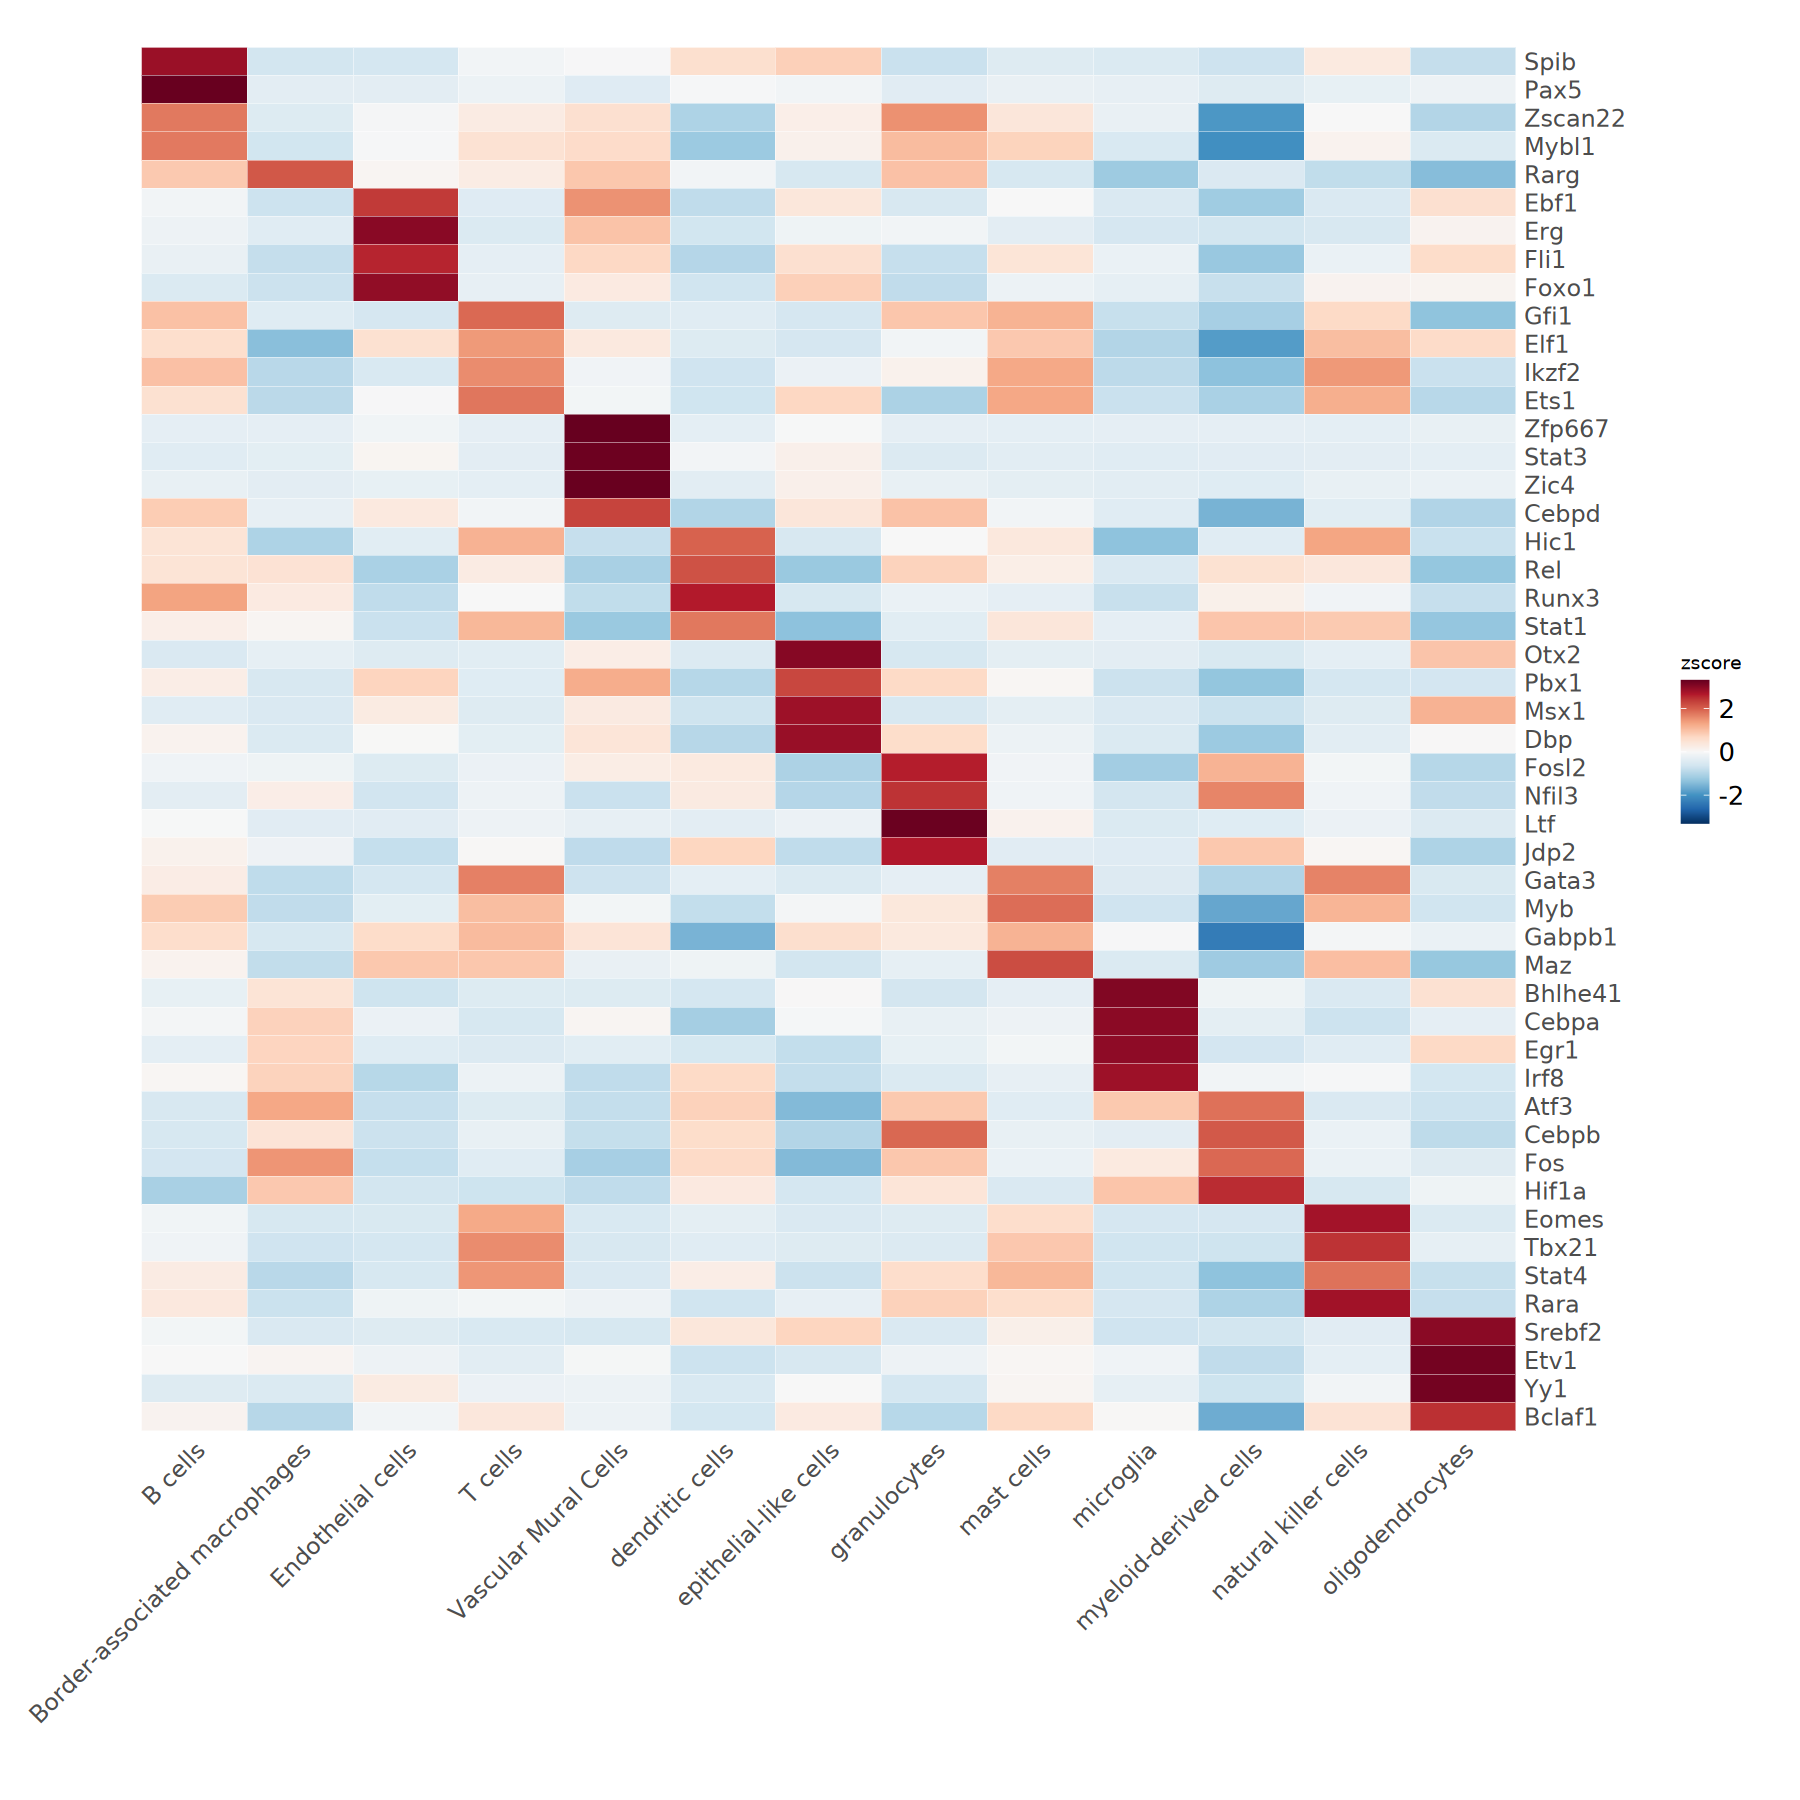

In [55]:
Heatmap(tf_zscore, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 3), "cm")) +
 my_theme

In [56]:
tf_zscore <- CalcStats(tf_auc, f = GBonilla_seurat$treatment_and_cell_types, order = "p", n = 4, t = TRUE)

Using id as id variables



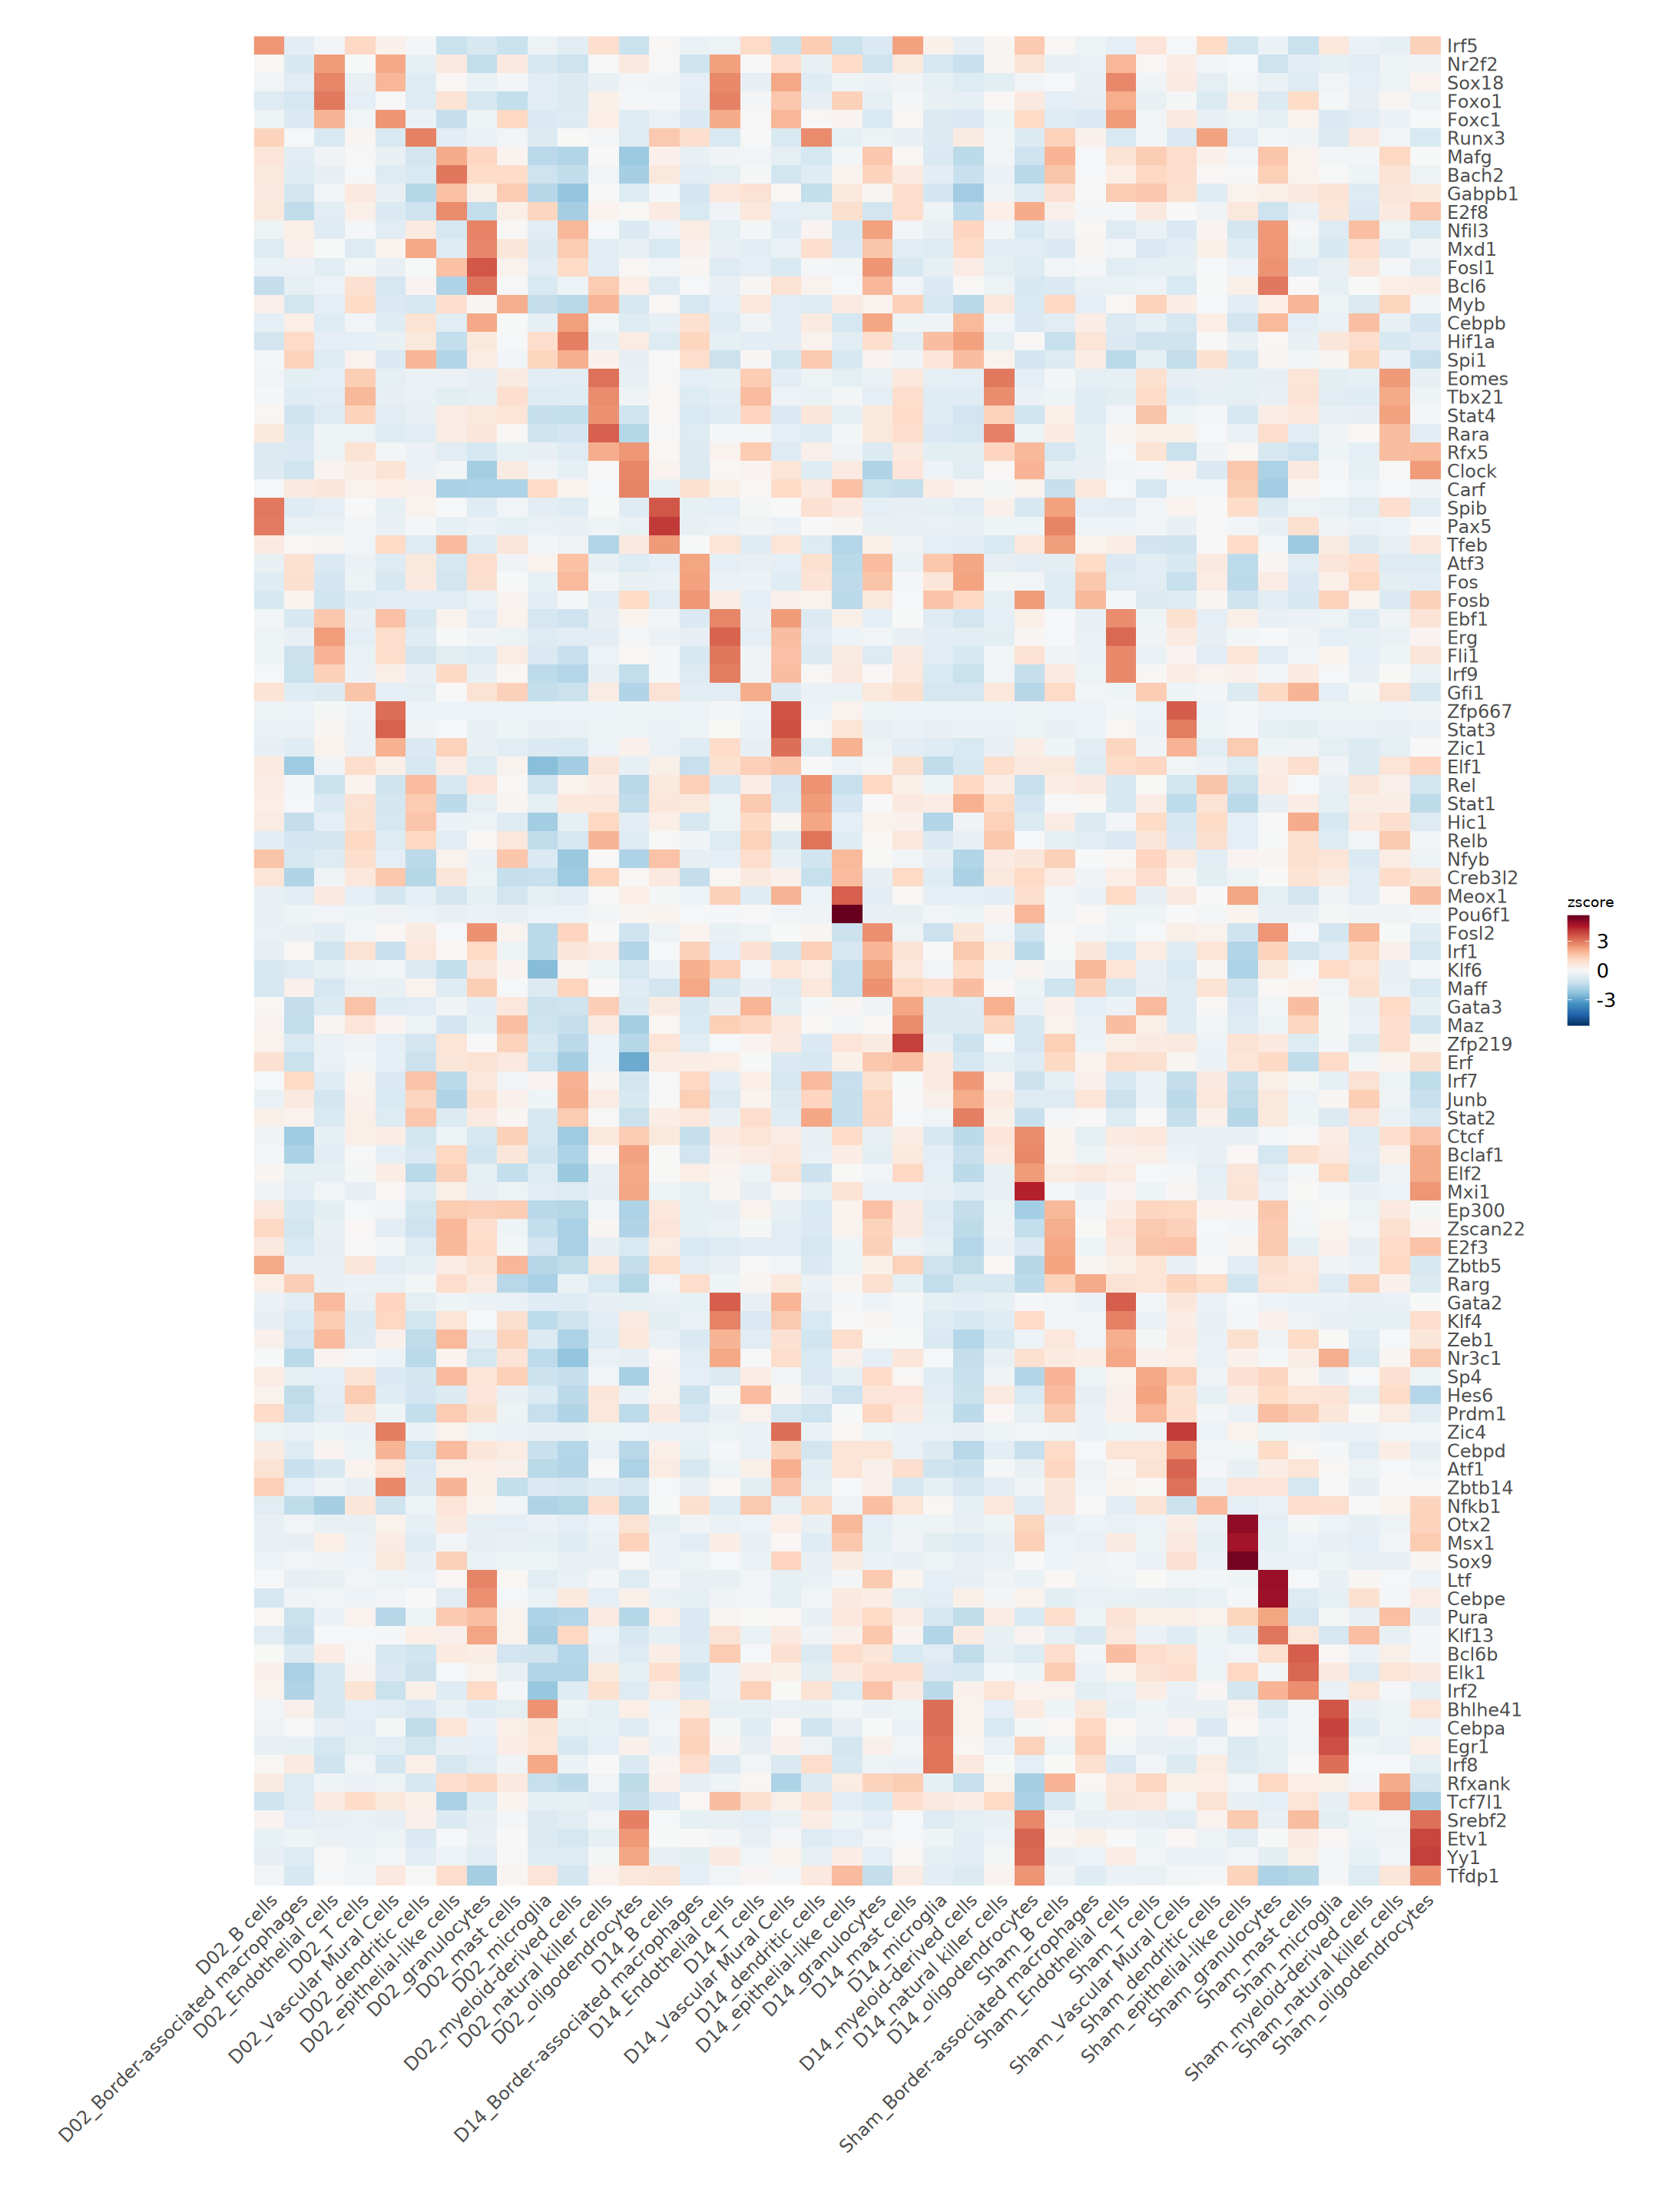

In [57]:
options(repr.plot.width = 18, repr.plot.height = 24) 

Heatmap(tf_zscore, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

In [58]:
# After PCA and UMAP calculations,
# following can also be used to visualize 
# TF activity and expression scores alongside.

# DimPlot2(
#   GBonilla_seurat,
#   features = c("ETS1", "ATF3", "tf_ETS1", "tf_ATF3"),
#   cols = list("tf_ETS1" = "D", "tf_ATF3" = "D"),
#   theme = NoAxes()
# )

In [59]:
GBonilla_seurat

An object of class Seurat 
14539 features across 43269 samples within 2 assays 
Active assay: RNA (14316 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: TF

In [60]:
# Scale counts:

all.genes <- rownames(GBonilla_seurat)
GBonilla_seurat <- ScaleData(GBonilla_seurat, features = all.genes)

Centering and scaling data matrix



In [61]:
GBonilla_seurat <- FindVariableFeatures(GBonilla_seurat, selection.method = "vst", nfeatures = 3000)

Finding variable features for layer counts



In [62]:
# Identify the 20 most highly variable genes
top20 <- head(VariableFeatures(GBonilla_seurat), 20)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(GBonilla_seurat)
plot2 <- LabelPoints(plot = plot1, points = top20, repel = TRUE)

When using repel, set xnudge and ynudge to 0 for optimal results



Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


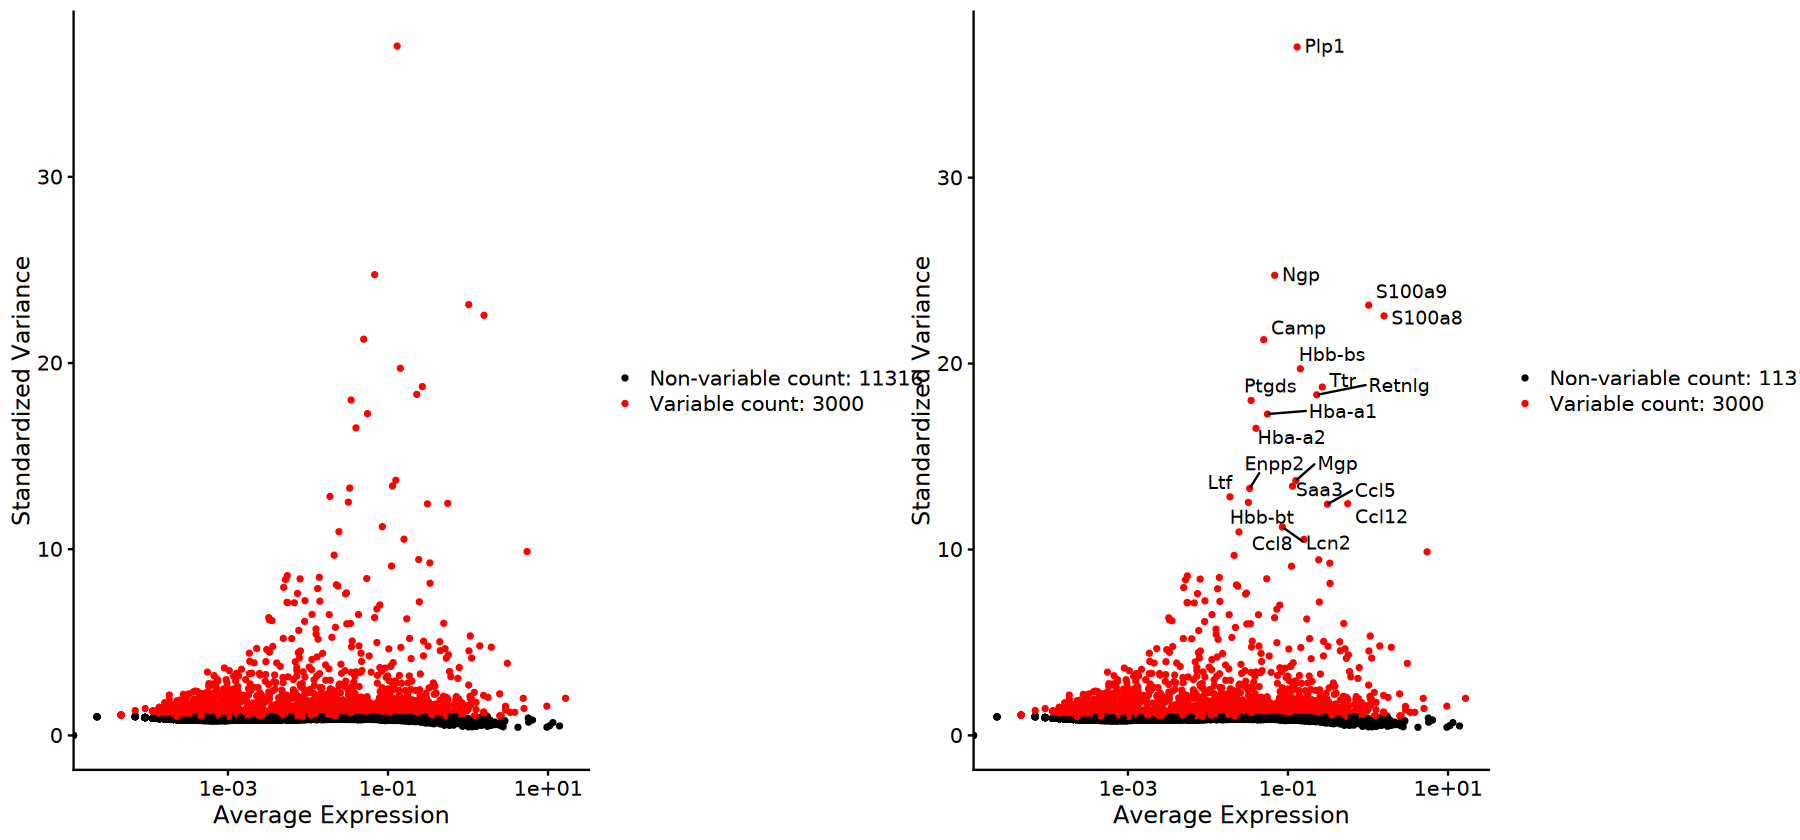

In [63]:
options(repr.plot.width = 15, repr.plot.height = 7) 

cowplot::plot_grid(plotlist = list(plot1, plot2))

In [64]:
GBonilla_seurat <- RunPCA(GBonilla_seurat, npcs = 50)

PC_ 1 
Positive:  Lyz2, Lgals3, Ctsb, Ms4a6c, Il1b, Tgfbi, Cd14, Wfdc17, S100a4, Lgals1 
	   Ifi27l2a, S100a6, Msrb1, Psap, Ms4a6d, Plac8, Ifi30, Cstb, Lilr4b, Ms4a4c 
	   Slfn2, Cd68, Ctsd, Ccr2, Mpeg1, Cxcl2, Ccl9, Cebpb, Ms4a6b, Ctsz 
Negative:  Ly6c1, Cldn5, Flt1, Itm2a, Igfbp7, Slco1a4, Sptbn1, Spock2, Egfl7, Sparcl1 
	   Adgrf5, Abcb1a, Ly6a, Tsc22d1, Bsg, Cxcl12, Ramp2, Slco1c1, Esam, Pcp4l1 
	   Ptprb, Pltp, Crip2, Slc9a3r2, Ptn, Hspb1, Adgrl4, Jcad, Ablim1, Id1 
PC_ 2 
Positive:  C1qa, Hexb, C1qc, C1qb, P2ry12, Fcrls, Olfml3, Gpr34, Tmem119, Serpine2 
	   Sparc, Trem2, Cd81, Ltc4s, Plxdc2, Ptgs1, Ctsd, Ldhb, Ly86, P2ry13 
	   Ctsl, Crybb1, Scoc, Ckb, Abhd12, Lair1, Zfhx3, Pmp22, Pde3b, Timp2 
Negative:  Ifitm3, Vim, S100a6, S100a11, Ifitm2, Lgals3, Srgn, Anxa2, S100a4, Crip1 
	   Tgfbi, Msrb1, Plac8, Cdkn1a, S100a10, Wfdc17, Il1b, Ms4a4c, Ms4a6c, Ly6c2 
	   Lgals1, Pim1, Lyz2, Ccr2, Thbs1, Tmsb10, Cstb, Id3, Lilr4b, Chil3 
PC_ 3 
Positive:  Cd63, Ctsd, Grn, Ctsz, Cd9, Ctsl, Ct

In [65]:
# In PC-1 genes, I see Cldn5 gene which encodes the claudin mebrane protein, a component of
# tight junction in blood brain barrier. PC1 seems to mostly distinguish the endothelial cells.

In [66]:
scCustomize::scCustomize_Palette(num_groups = 20)

[1] "#5A5156FF" "#E4E1E3FF" "#F6222EFF" "#FE00FAFF" "#16FF32FF" "#3283FEFF"
 [7] "#FEAF16FF" "#B00068FF" "#1CFFCEFF" "#90AD1CFF" "#2ED9FFFF" "#DEA0FDFF"
[13] "#AA0DFEFF" "#F8A19FFF" "#325A9BFF" "#C4451CFF" "#1C8356FF" "#85660DFF"
[19] "#B10DA1FF" "#FBE426FF"

In [67]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

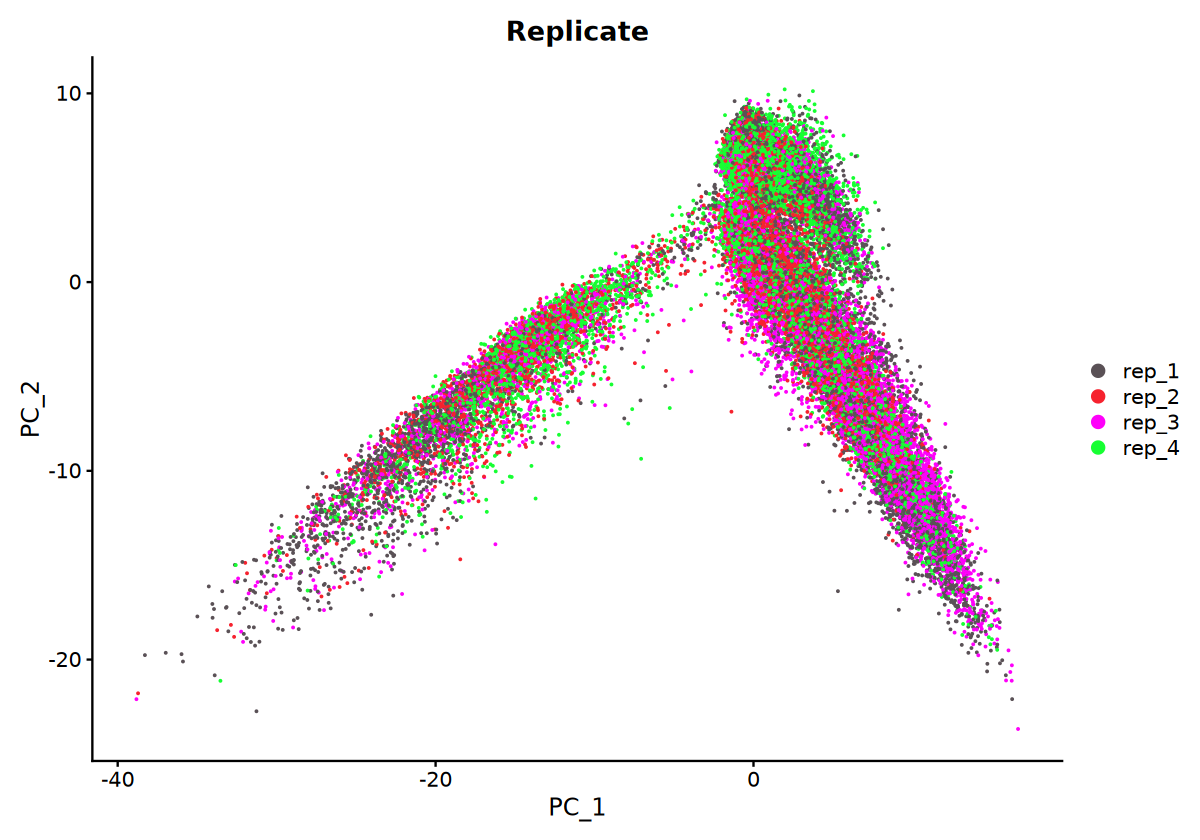

In [68]:
options(repr.plot.width = 10, repr.plot.height = 7) 

DimPlot(GBonilla_seurat, reduction = "pca", group.by = 'Replicate', shuffle = TRUE, cols = my_colours)

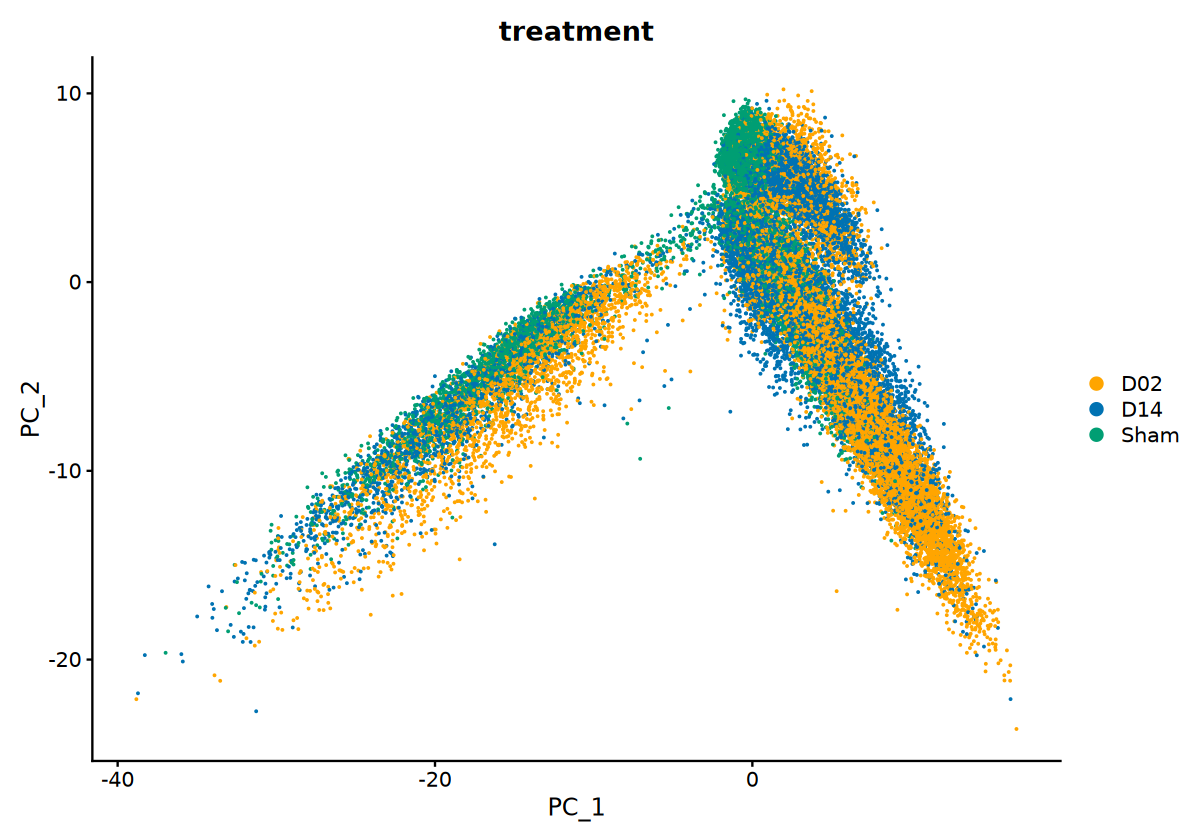

In [69]:
DimPlot(GBonilla_seurat, 
        reduction = "pca", 
        group.by = 'treatment', 
        shuffle = TRUE, 
        cols = scCustomize::scCustomize_Palette(num_groups = 3))

In [70]:
# parent column contains main cell type names.

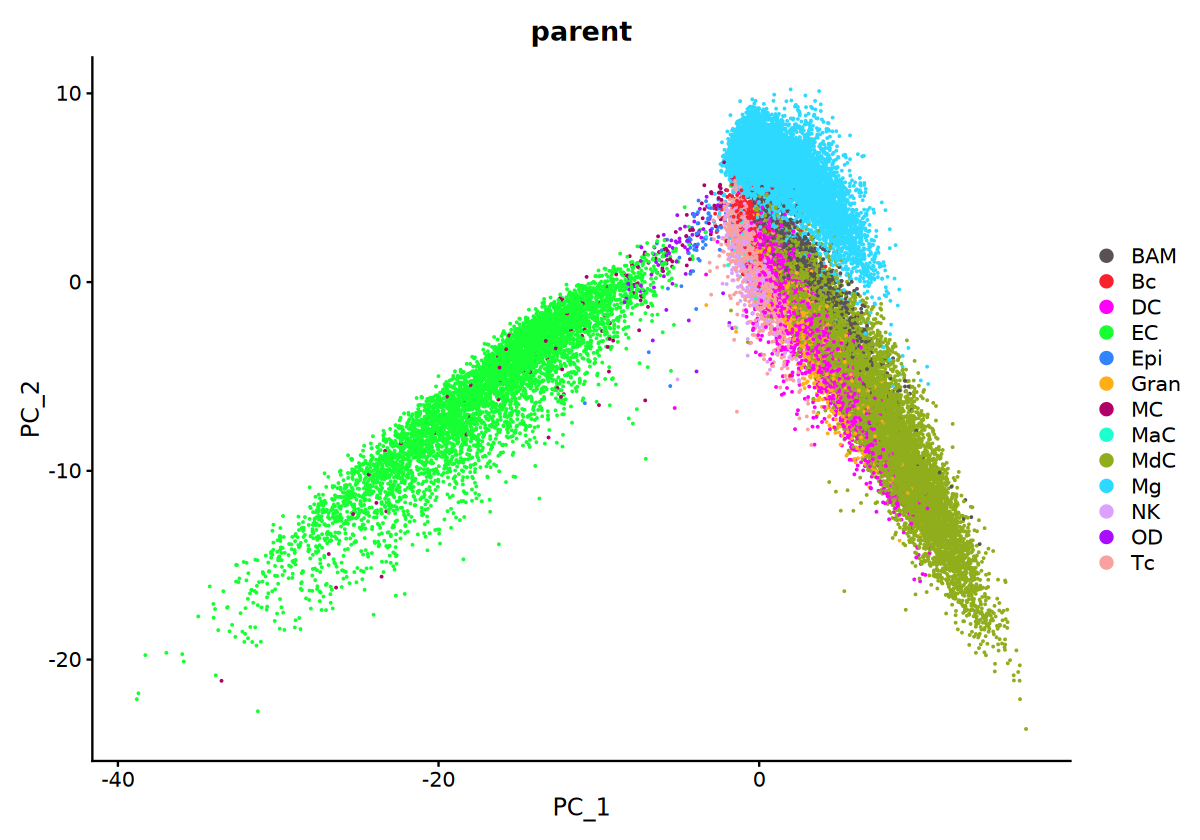

In [71]:
DimPlot(GBonilla_seurat, reduction = "pca", group.by = 'parent', shuffle = TRUE, cols = my_colours) 

BAM: Border-associated macrophages. \
Mg: microglia \
MdC: myeloid-derived cells \
Gran: granulocytes \
MaC: mast cells \
DC: dendritic cells \
Tc: cells \
NK: natural killer cells \
Bc: B cells \
EC: Endothelial cells \
MC: Vascular Mural Cells \
Epi: epithelial-like cells \
OD: oligodendrocytes

In [72]:
# Run harmony for batch correction according to the authors' way:

In [73]:
# "The data from replicate experiments were combined into 
# four sets so that each set included a Sham, D02 and D14 experiment. 
# We ran harmony on the first 40 PCA dimensions with a maximum of 20 iterations."

In [74]:
table(GBonilla_seurat$Replicate, GBonilla_seurat$treatment)

       
         D02  D14 Sham
  rep_1 3540 2983 3465
  rep_2 3335 2648 4714
  rep_3 3457 2665 3048
  rep_4 4491 5121 3802

In [75]:
# installed harmony to guix profile:

.libPaths(new = my_seurat_extend_with_domc_package, include.site = FALSE)

library(harmony)

Loading required package: Rcpp



In [76]:
GBonilla_seurat <- RunHarmony(GBonilla_seurat, 
                              group.by.vars = "Replicate", 
                              reduction.use = 'pca', 
                              dims.use = 1:40, 
                              max.iter.harmony = 20)

Warning message:
"Warning: The parameter max.iter.harmony is replaced with parameter max_iter. It will be ignored for this function call and please use parameter max_iter in future function calls.
This warning is displayed once per session."
Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [77]:
options(repr.plot.width = 15, repr.plot.height = 8)

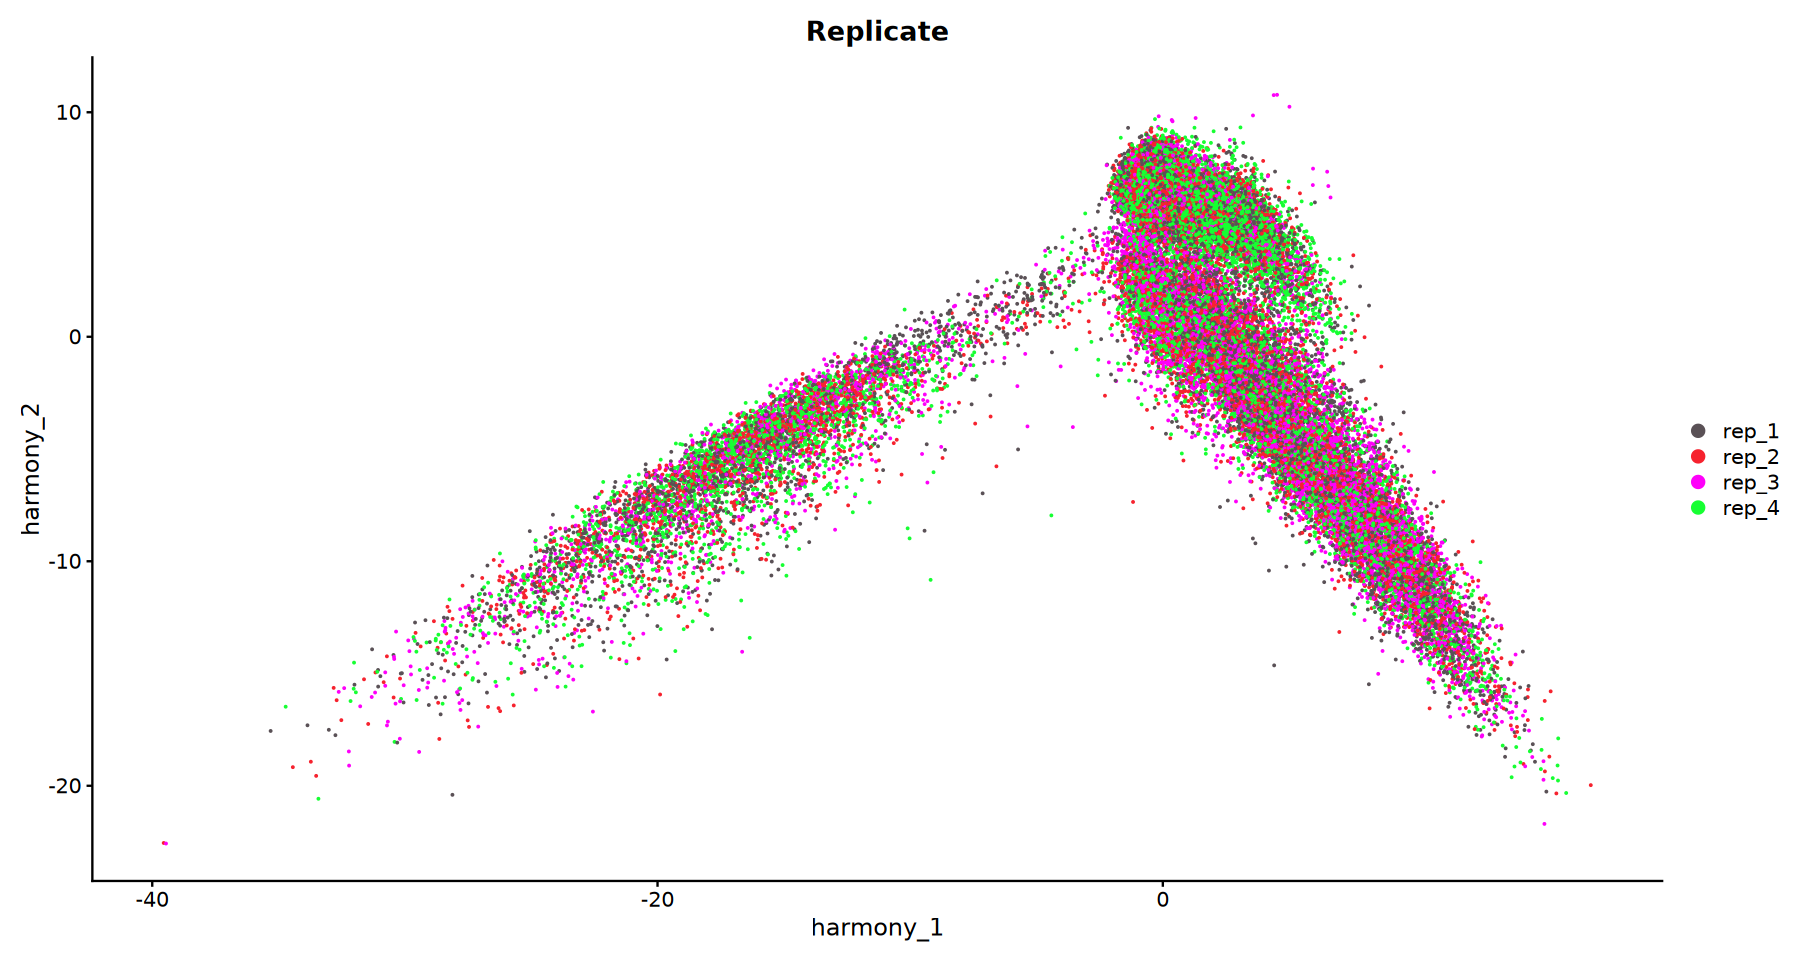

In [78]:
DimPlot(GBonilla_seurat, 
        reduction = "harmony", 
        group.by = 'Replicate', 
        shuffle = TRUE, 
        cols = my_colours) 

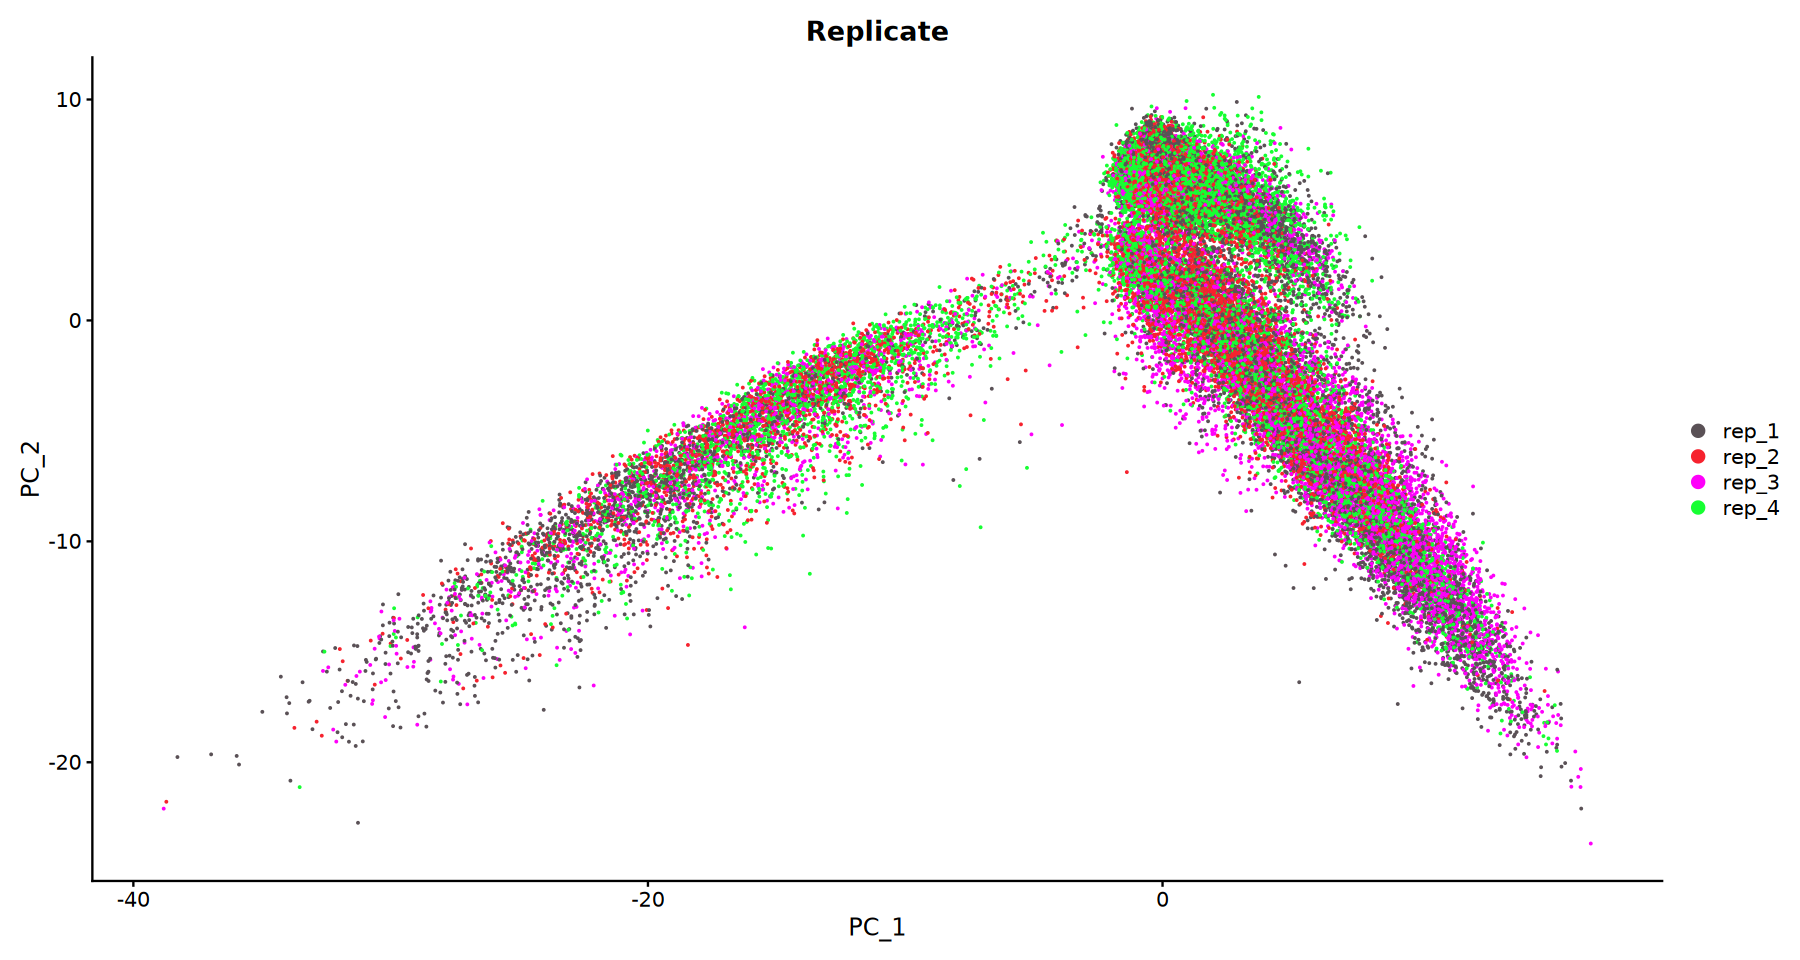

In [79]:
# without integration:

DimPlot(GBonilla_seurat, 
        reduction = "pca", 
        group.by = 'Replicate', 
        shuffle = TRUE, 
        cols = my_colours) 

In [80]:
p1 <- DimPlot(GBonilla_seurat, reduction = "pca", group.by = 'Replicate', shuffle = TRUE, cols = my_colours) + ggtitle(label = 'PCA')

In [81]:
p2 <- DimPlot(GBonilla_seurat, reduction = "harmony", group.by = 'Replicate', shuffle = TRUE, cols = my_colours) + ggtitle(label = 'HARMONY_PCA')

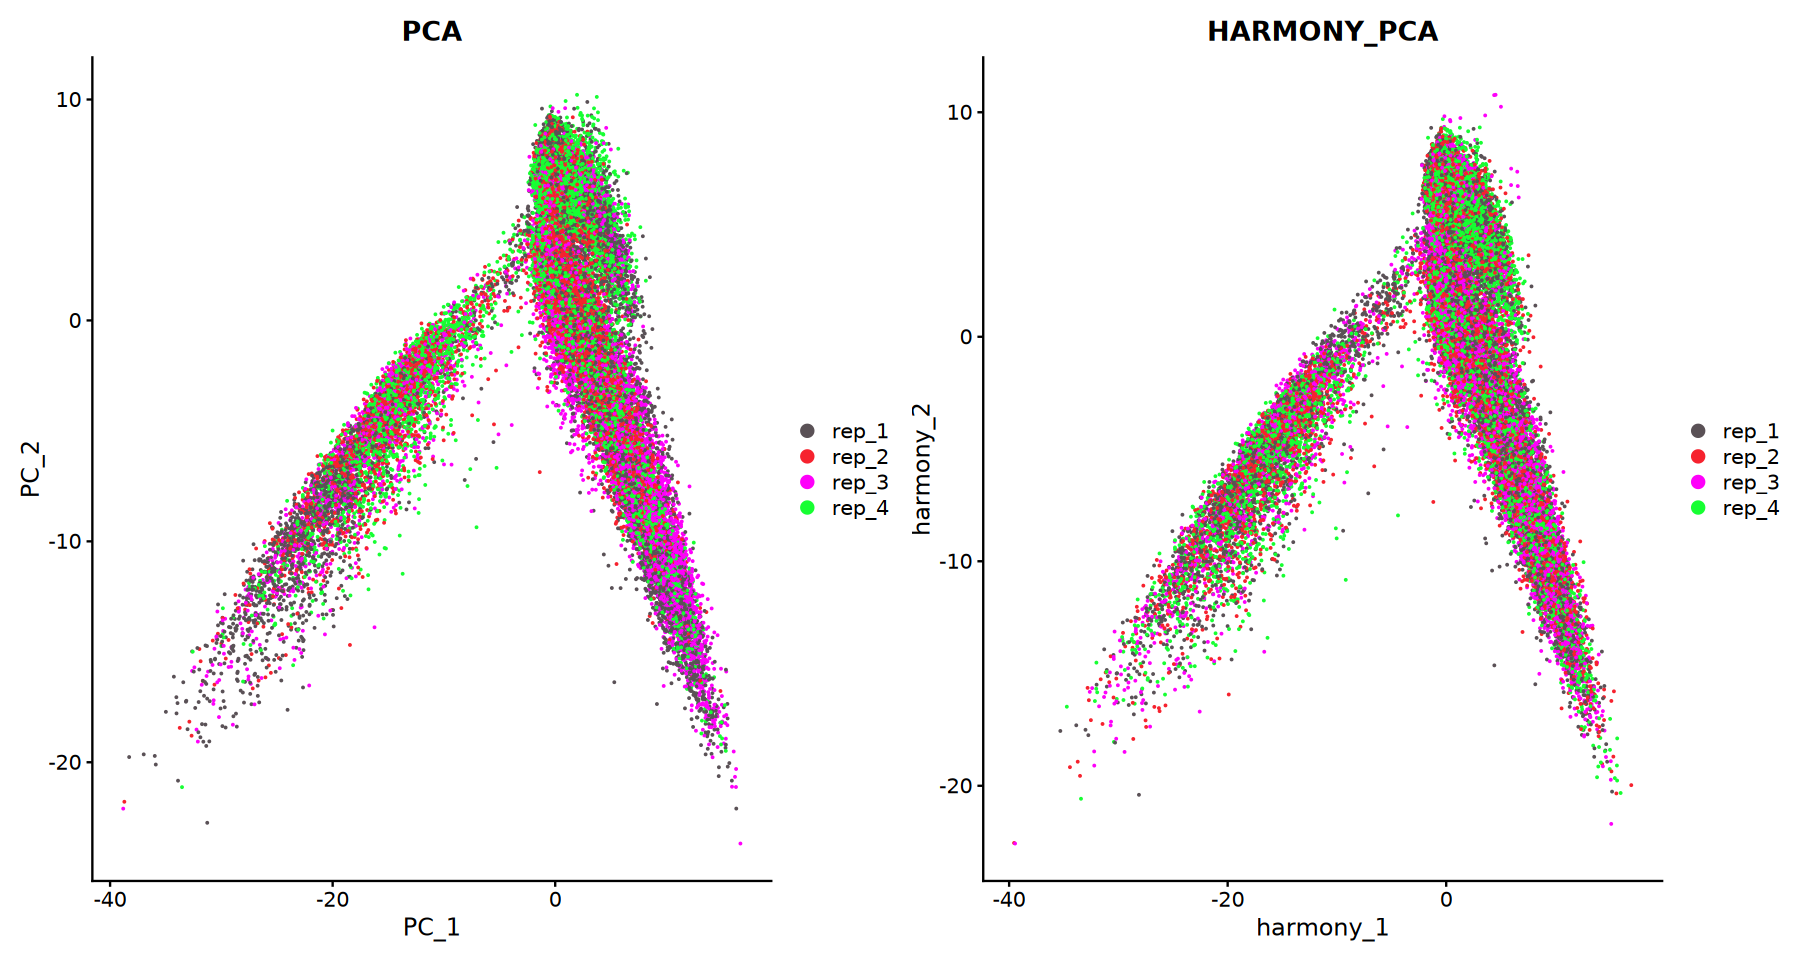

In [82]:
p1 + p2

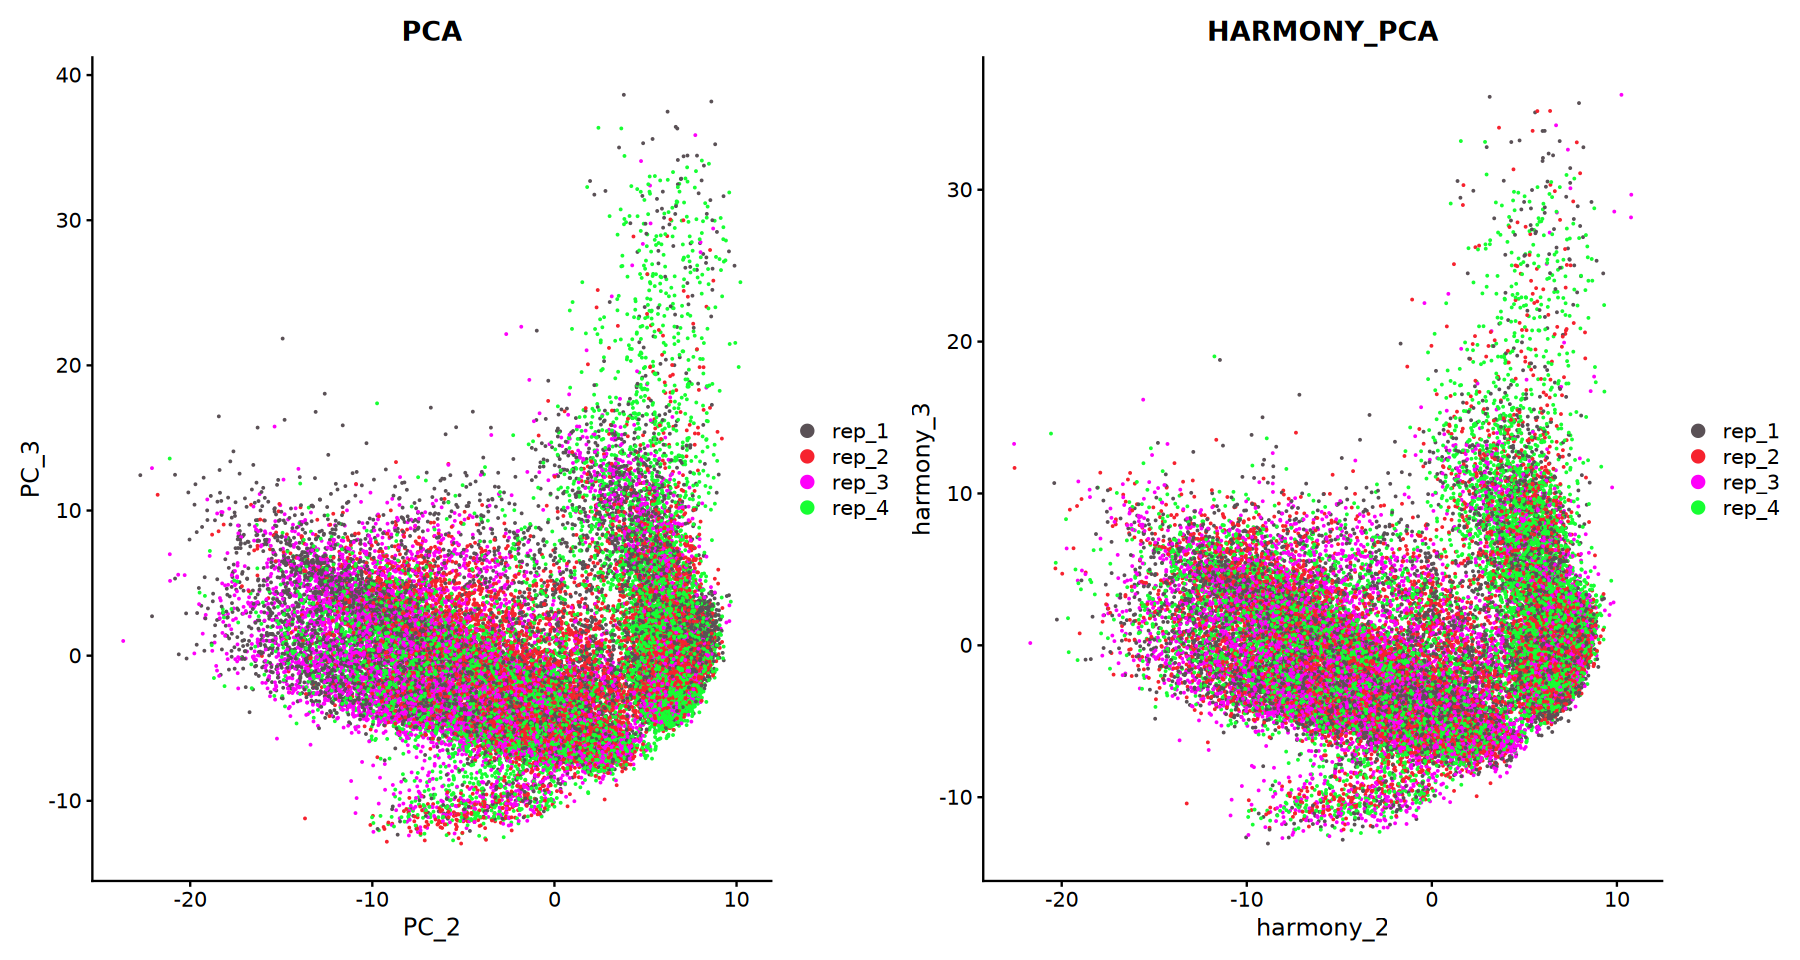

In [83]:
p1 <- DimPlot(GBonilla_seurat, reduction = "pca", group.by = 'Replicate', shuffle = TRUE, dims = 2:3, cols = my_colours) + ggtitle(label = 'PCA')
p2 <- DimPlot(GBonilla_seurat, reduction = "harmony", group.by = 'Replicate', shuffle = TRUE, dims = 2:3,  cols = my_colours) + ggtitle(label = 'HARMONY_PCA')

p1 + p2

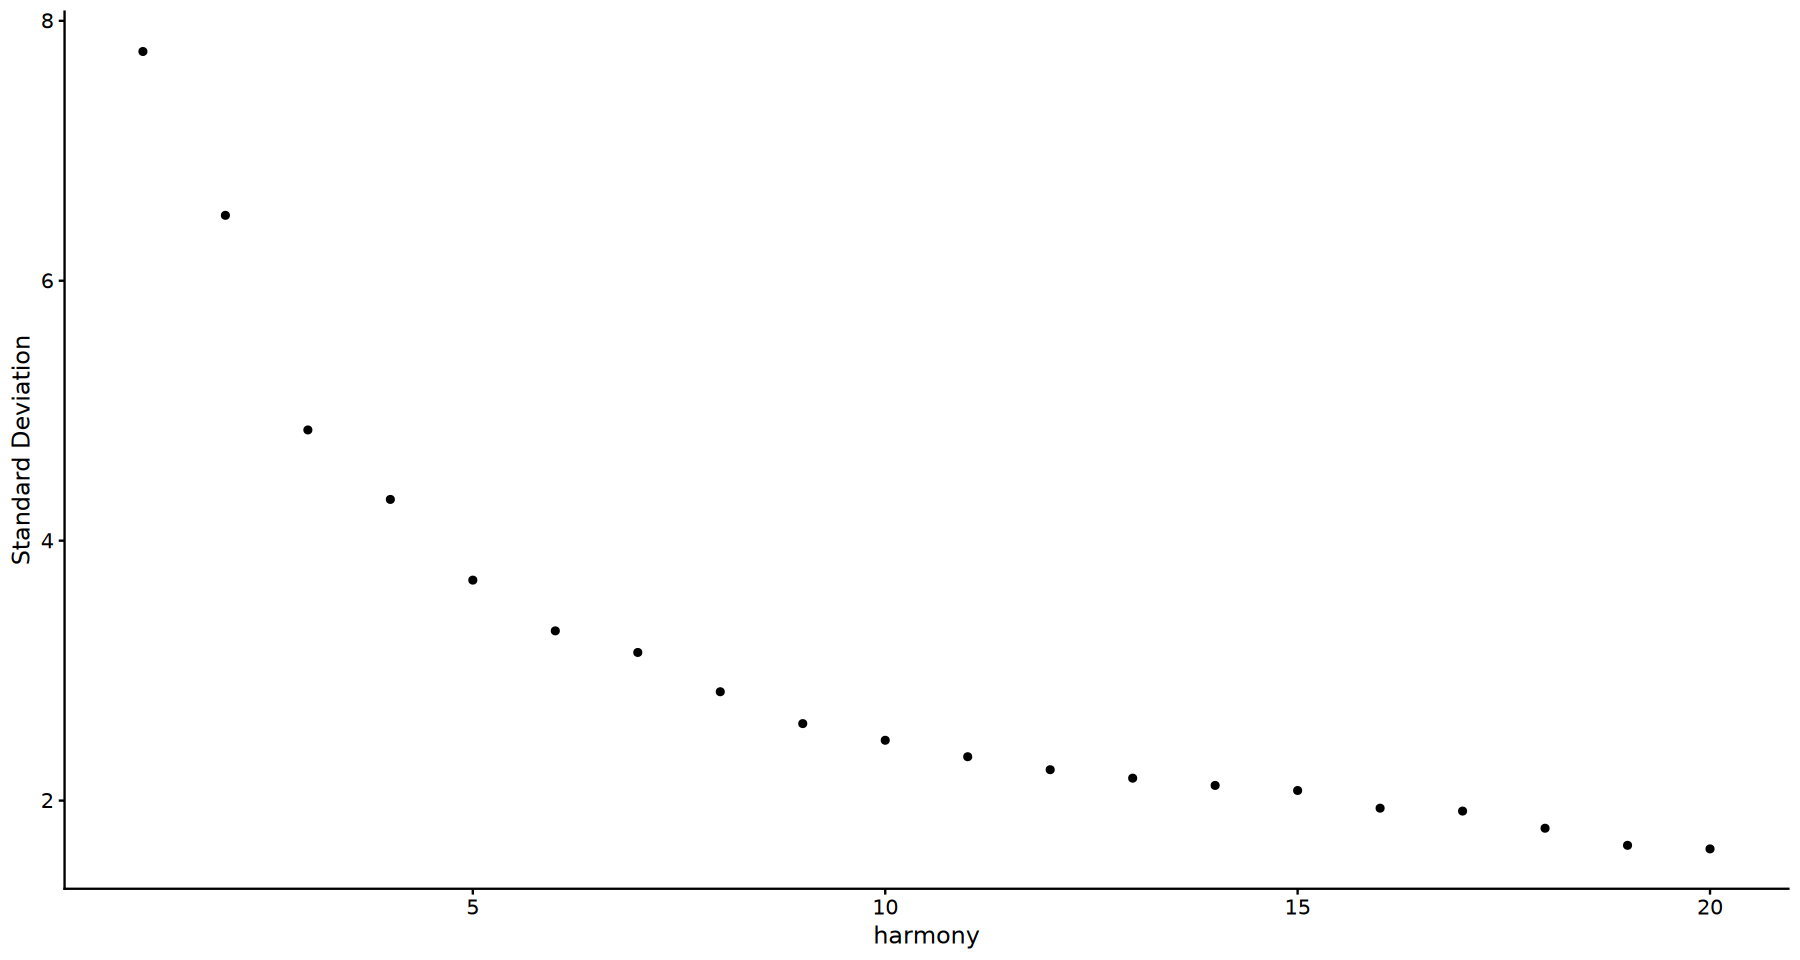

In [184]:
ElbowPlot(GBonilla_seurat, reduction = 'harmony')

In [84]:
GBonilla_seurat <- RunUMAP(GBonilla_seurat, reduction = 'harmony', dims = 1:40)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
00:20:47 UMAP embedding parameters a = 0.9922 b = 1.112

00:20:47 Read 43269 rows and found 40 numeric columns

00:20:47 Using Annoy for neighbor search, n_neighbors = 30

00:20:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:20:53 Writing NN index file to temp file /tmp/RtmpDjIBtK/file2c332a7792dc33

00:20:53 Searching Annoy index using 1 thread, search_k = 3000

00:21:07 Annoy recall = 100%

00:21:08 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

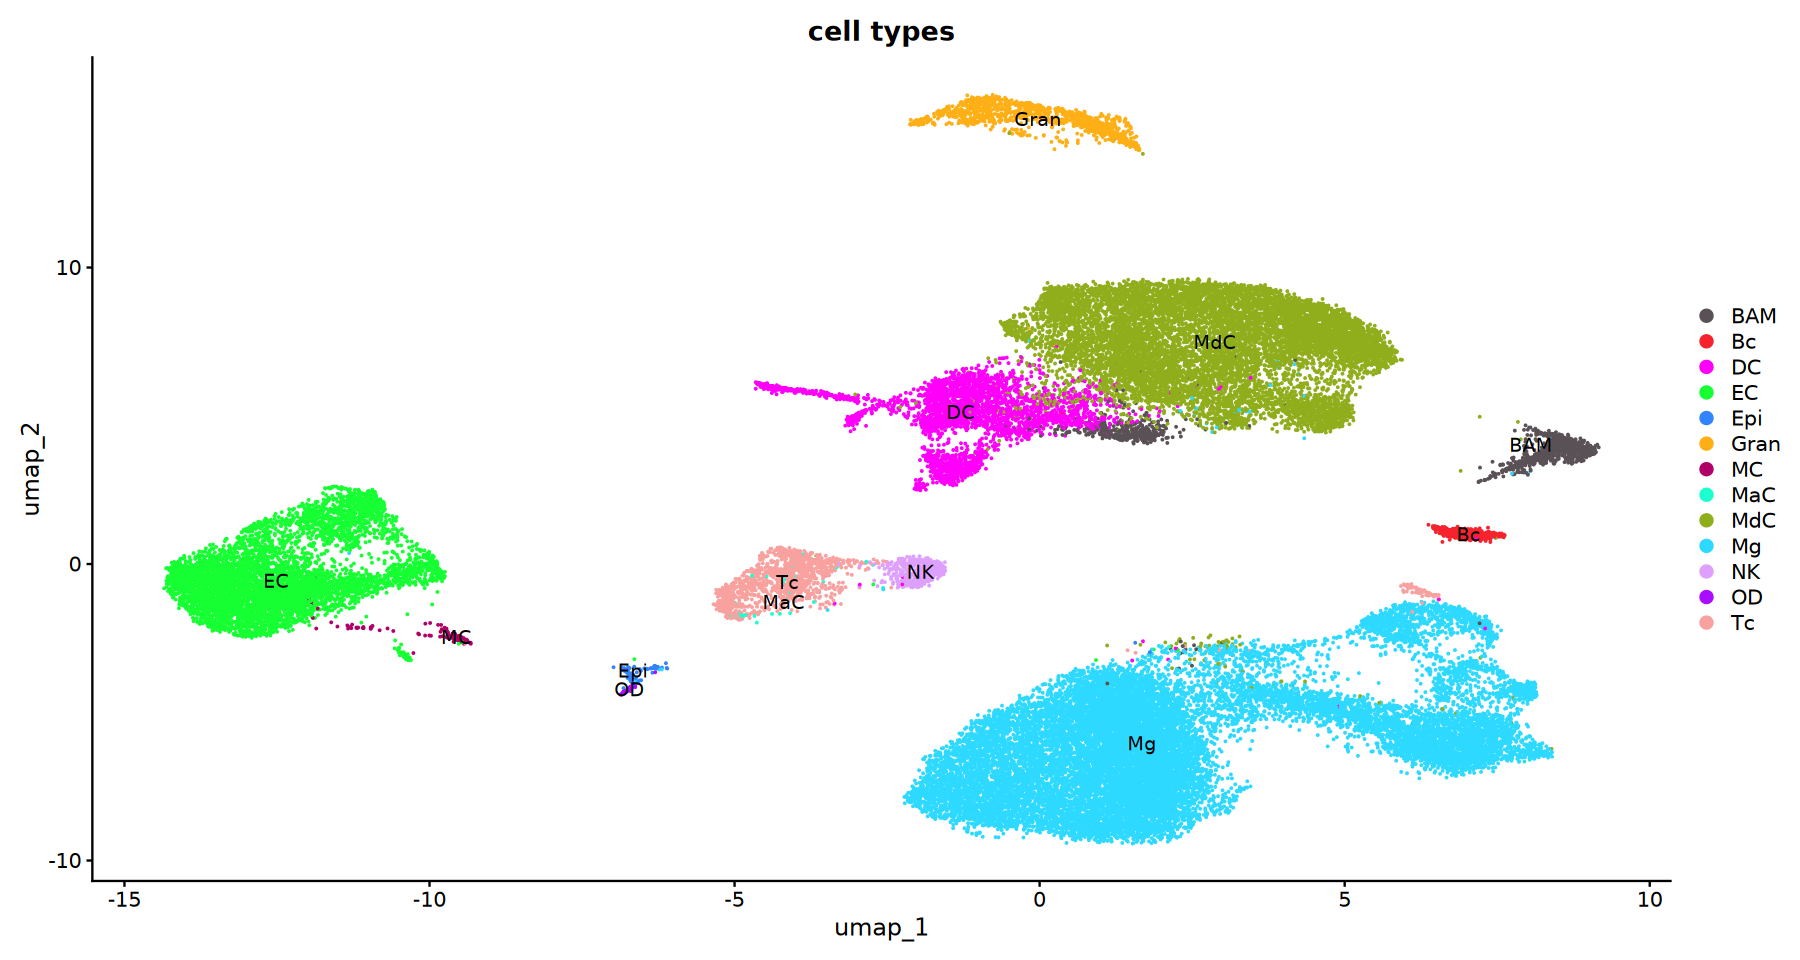

In [85]:
DimPlot(GBonilla_seurat, reduction = "umap", group.by = 'parent', cols = my_colours, label = TRUE) + ggtitle('cell types')

In [86]:
GBonilla_seurat

An object of class Seurat 
14539 features across 43269 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

Loading required package: cowplot


Attaching package: 'cowplot'


The following object is masked from 'package:mosaic':

    theme_map




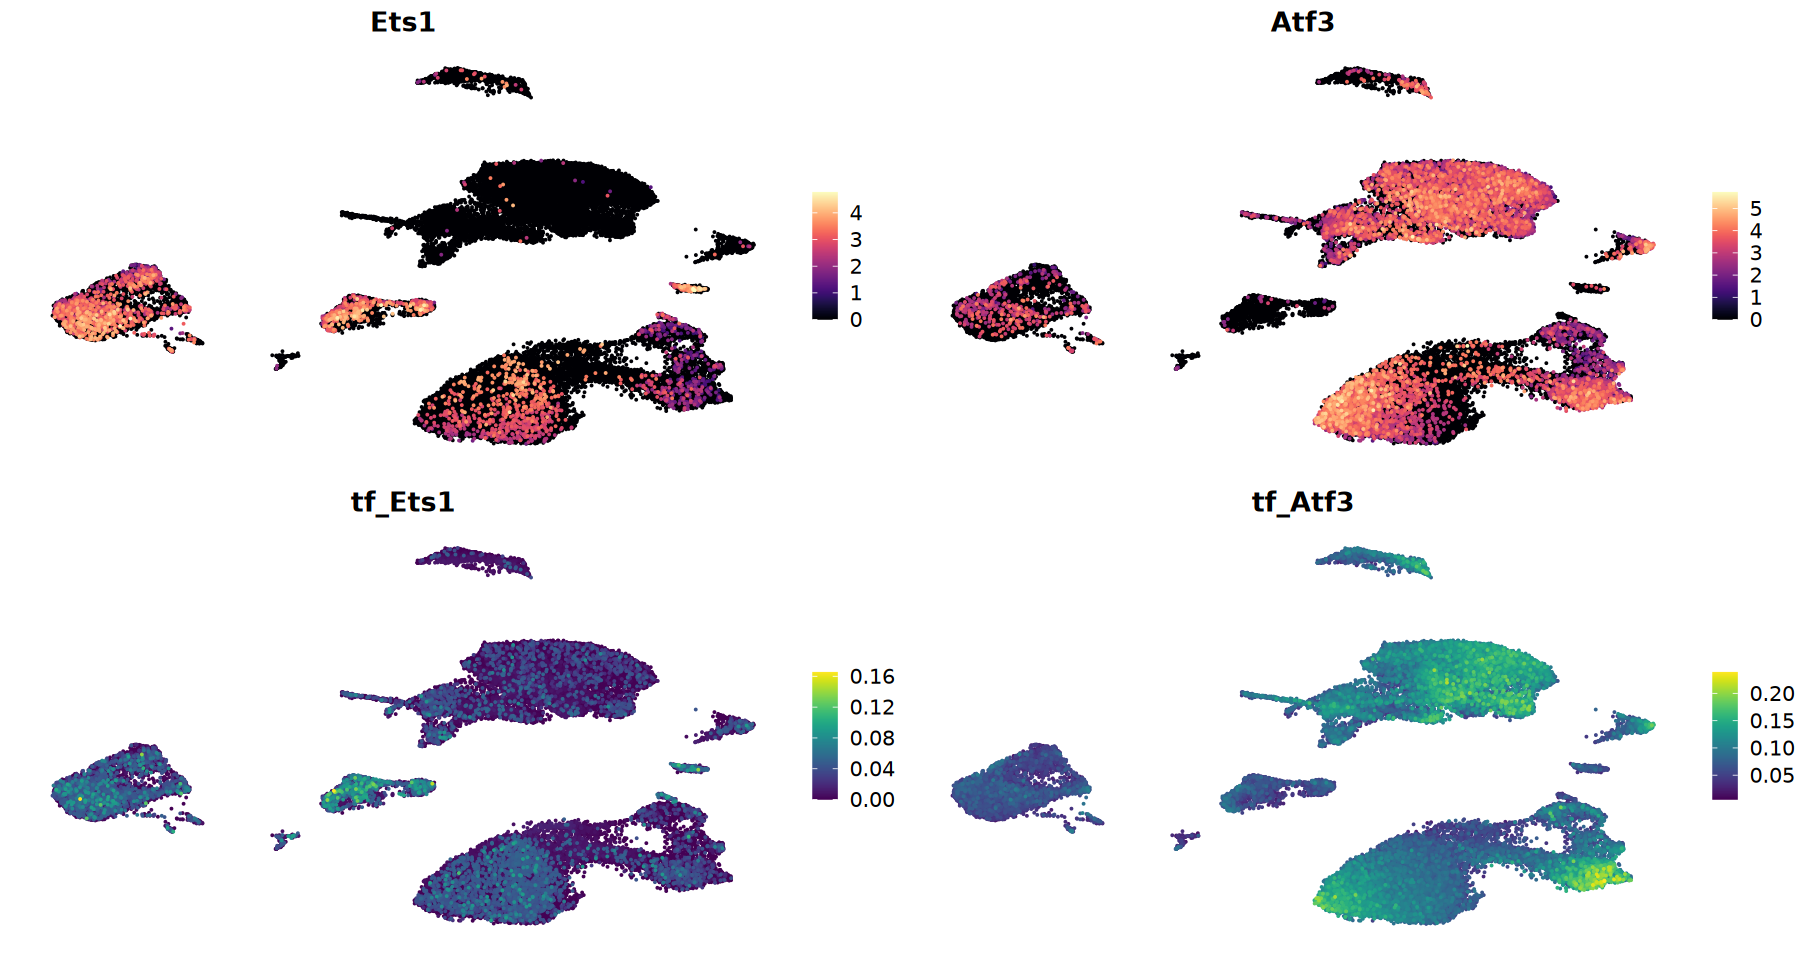

In [88]:
# View tf expression and regulon AUC score:

DimPlot2(
  GBonilla_seurat,
  features = c("Ets1", "Atf3", "tf_Ets1", "tf_Atf3"),
  cols = list("tf_Ets1" = "D", "tf_Atf3" = "D"),
  theme = NoAxes()
)

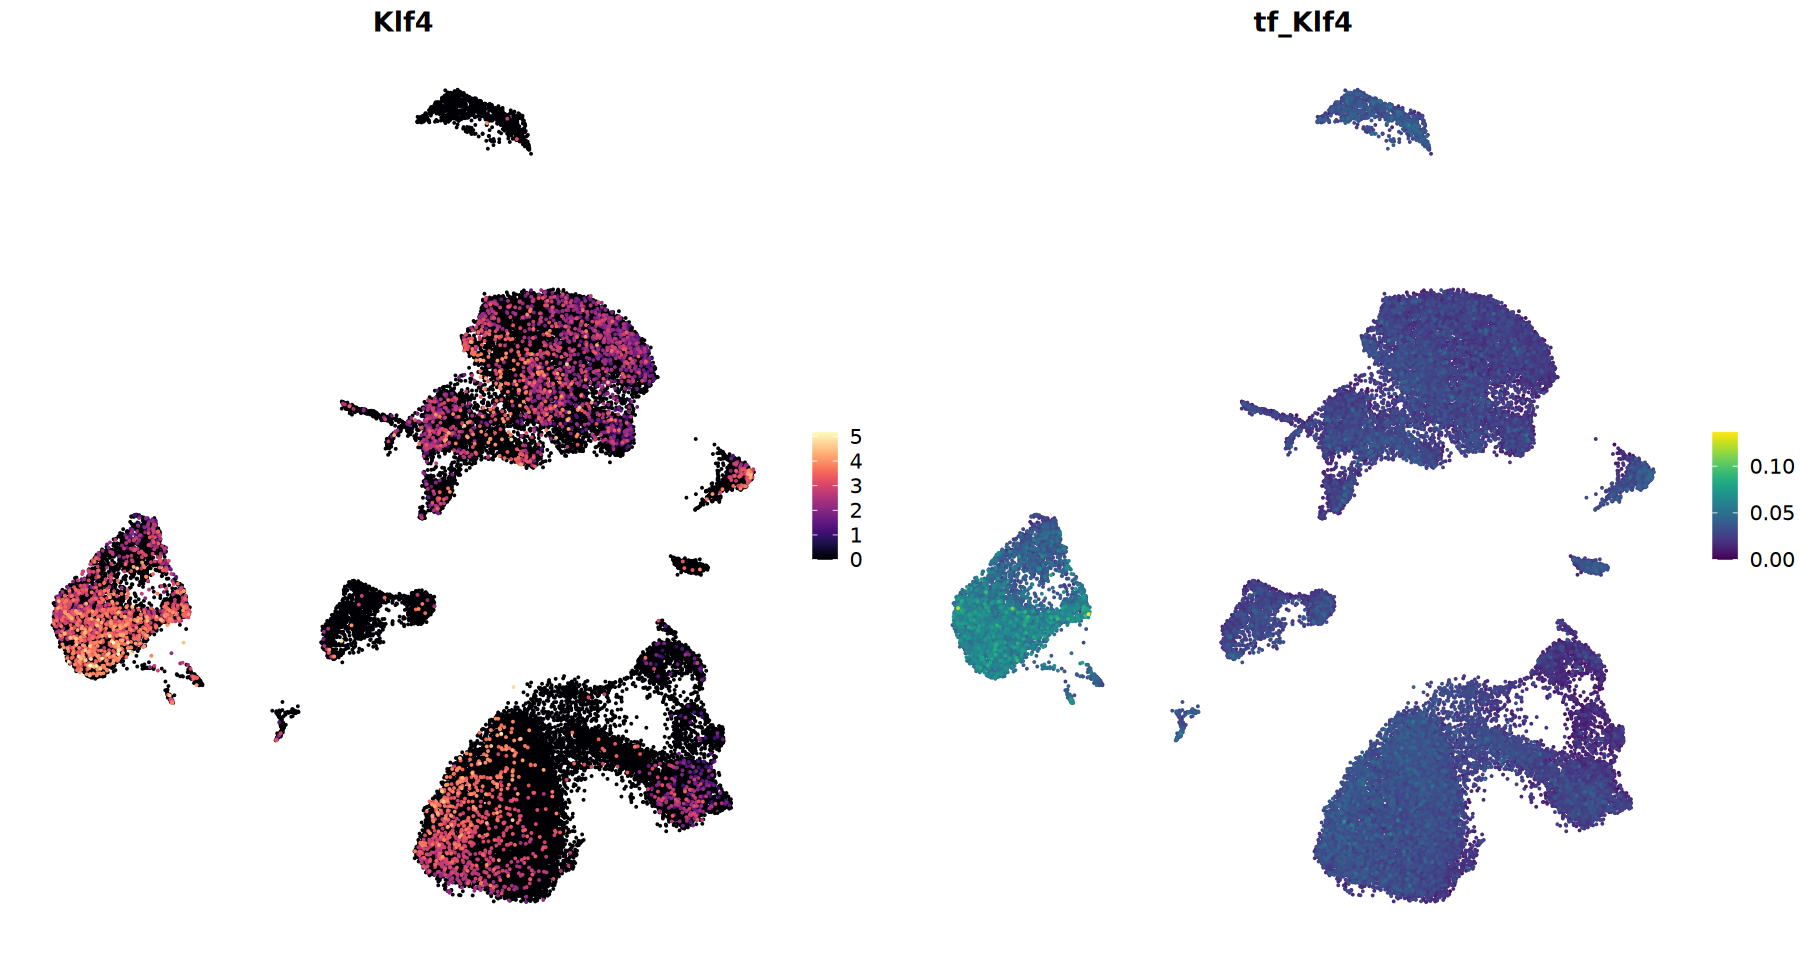

In [89]:
DimPlot2(
  GBonilla_seurat,
  features = c("Klf4", "tf_Klf4"),
  cols = list("tf_Klf4" = "D"),
  theme = NoAxes()
)

In [90]:
GBonilla_seurat %>% 
    saveRDS(here::here('r_objects', 'GBonilla_seurat_w_Regulons.RDS'))

In [91]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cowplot_1.1.3          harmony_1.2.1          Rcpp_1.0.13-1         
 [4] RColorBrewer_1.1-3     viridis_0.6.5          viridisLite_0.4.2     
 [7] rlang_1.1.4            scales_1.3.0           reshape2_1.4.4        
[10] mosaic_1.9.1           mosaicData_0.20.4      ggformula_0.